In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import seaborn as sns

In [34]:
#Variables for the regared measures
measure_classification = ":balanced_accuracy"
measure_regression = ":rooted_mean_squared_error"

In [35]:

mapping = {':autokeras': 1, ':lama': 2, ':evalml': 1, ':gama': 2, ':autogluon': 3, ':pycaret': 4, ':flaml': 5, ':tpot': 6, ':mljar': 7}

file_path = os.path.join(os.getcwd(), "data")
df = pd.read_csv(os.path.join(file_path,"datasetData.csv"))
df_copy = df.copy()

df_copy["AutoML_solution"] = df_copy["AutoML_solution"].map(mapping)


runtime_dataset = pd.read_csv(os.path.join(file_path, "runtimeDataset.csv"))
run_df_copy = runtime_dataset.copy()

run_df_copy["AutoML_solution"] = run_df_copy["AutoML_solution"].map(mapping)

with open(os.path.join(file_path , "runtime_prediction_parameters.json"), "r") as f:
    parameter = json.load(f)

groups = df.groupby(["task"])
runtime_groups = runtime_dataset.groupby(["task"])

In [36]:
def plot(title: str, x_label: str, y_label: str, title_legend: str, bbox=(0.95, 1) ):
    """sets the parameters for the plot

    Args:
        title (str): the title of the plot
        x_label (str): the x label of the plot
        y_label (str): the y label of the plot
        title_legend (str): the name of the legend
        bbox (tuple, optional): the size of the legend. Defaults to (0.95, 1).
    """
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.title(title)
    plt.legend(title=title_legend, bbox_to_anchor=bbox, loc="upper left")
    plt.show()

In [37]:
value_distribution = df[':balanced_accuracy'].value_counts()

print(value_distribution)
value_of_interest = 0.00000

# Get the count of the value of interest
count_of_interest = value_distribution.get(value_of_interest, 0)

# Calculate the percentage
percentage = (count_of_interest / len(df[':balanced_accuracy'])) * 100

print(f"The percentage of '{value_of_interest}' occurrences: {percentage:.2f}%")

:balanced_accuracy
0.000000    149
1.000000     43
0.500000     26
0.995372      9
0.544444      8
           ... 
0.924800      1
0.923841      1
0.751170      1
0.923931      1
0.858063      1
Name: count, Length: 579, dtype: int64
The percentage of '0.0' occurrences: 14.29%


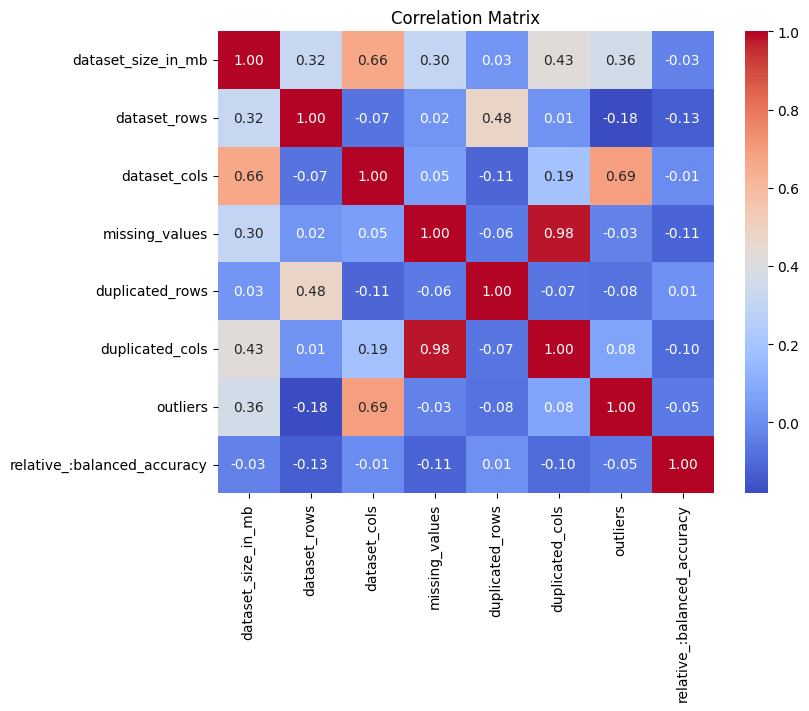

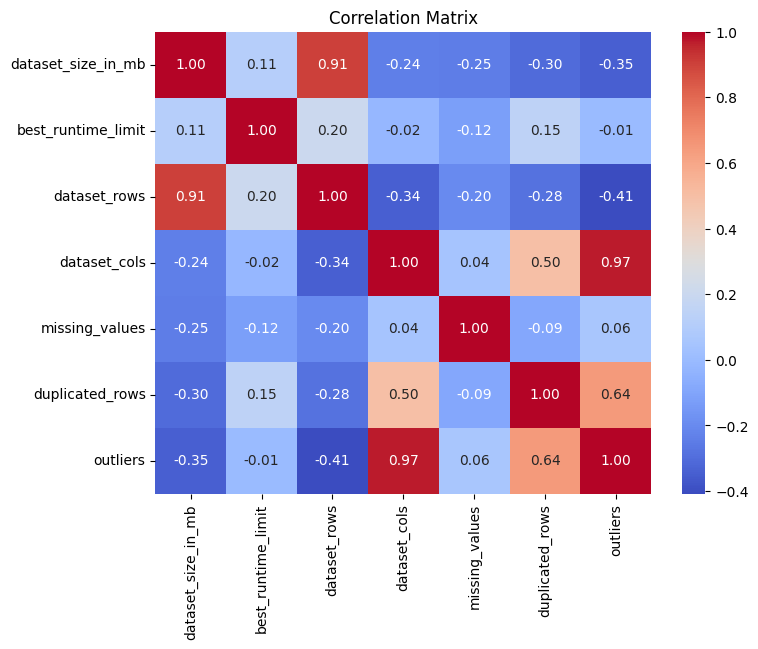

In [38]:


corr_matrix = df_copy.drop(["Unnamed: 0", "AutoML_solution", "task", "trainings_id", "dataset_name", ":rooted_mean_squared_error", ":balanced_accuracy", "relative_:rooted_mean_squared_error", "failed", "runtime_limit", "runtime"], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


corr_matrix = run_df_copy.drop(["Unnamed: 0", "dataset_name", "task", "duplicated_cols", ":balanced_accuracy", "AutoML_solution"], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

This section generates plots for evey AutoMl to descibe the relation between the relative balanced accuracy / rmse and the size of the dataset

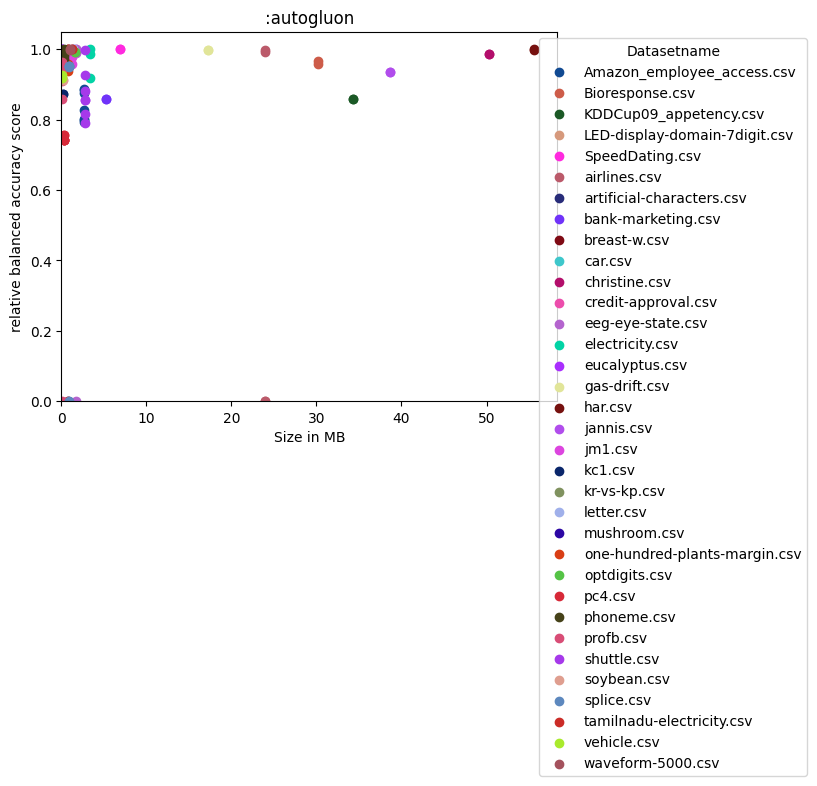

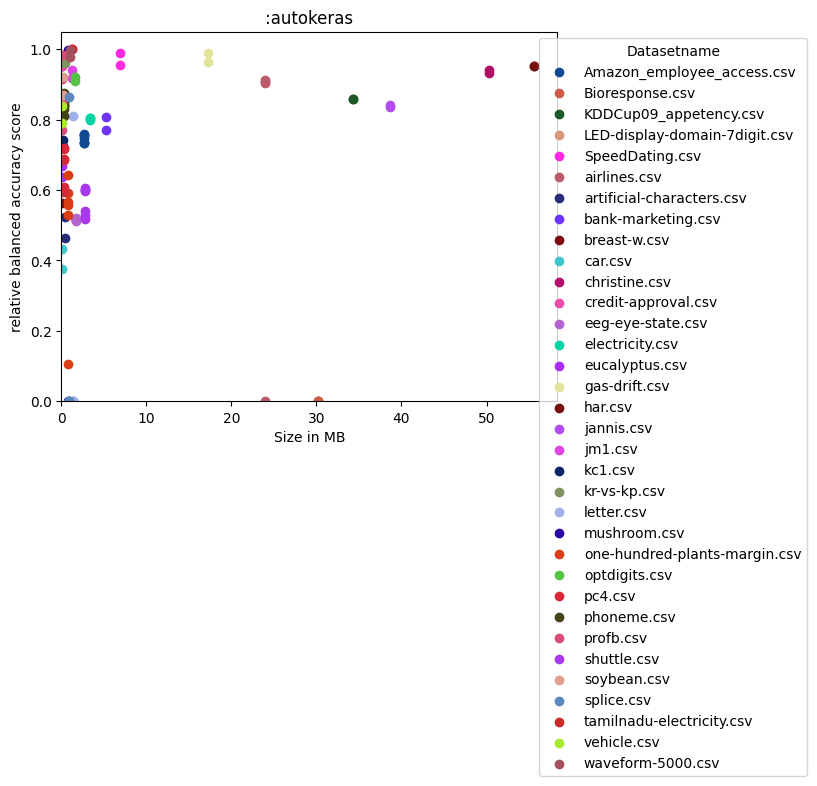

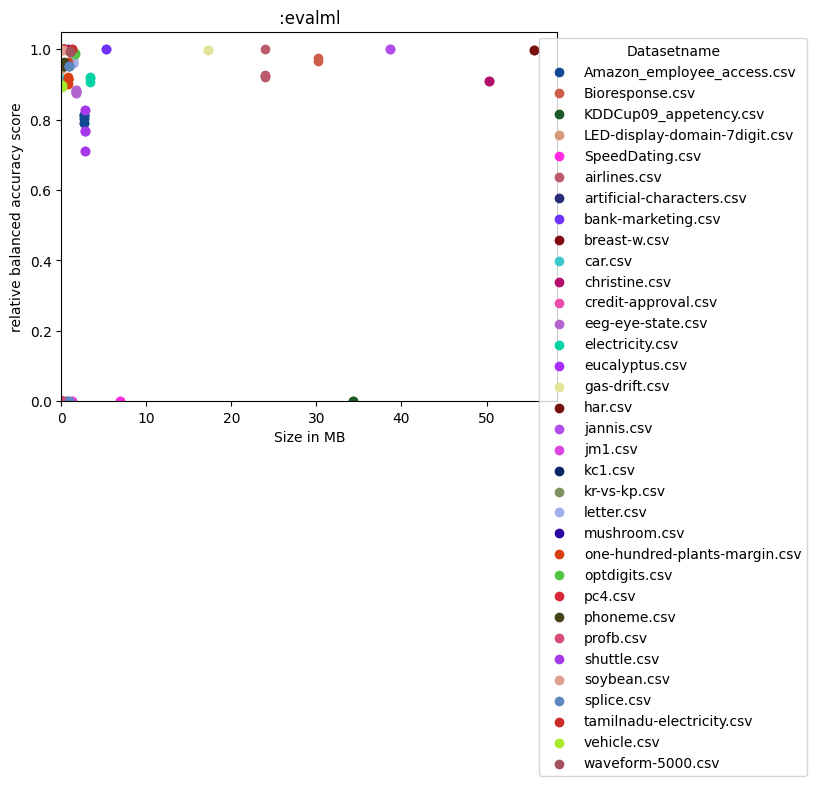

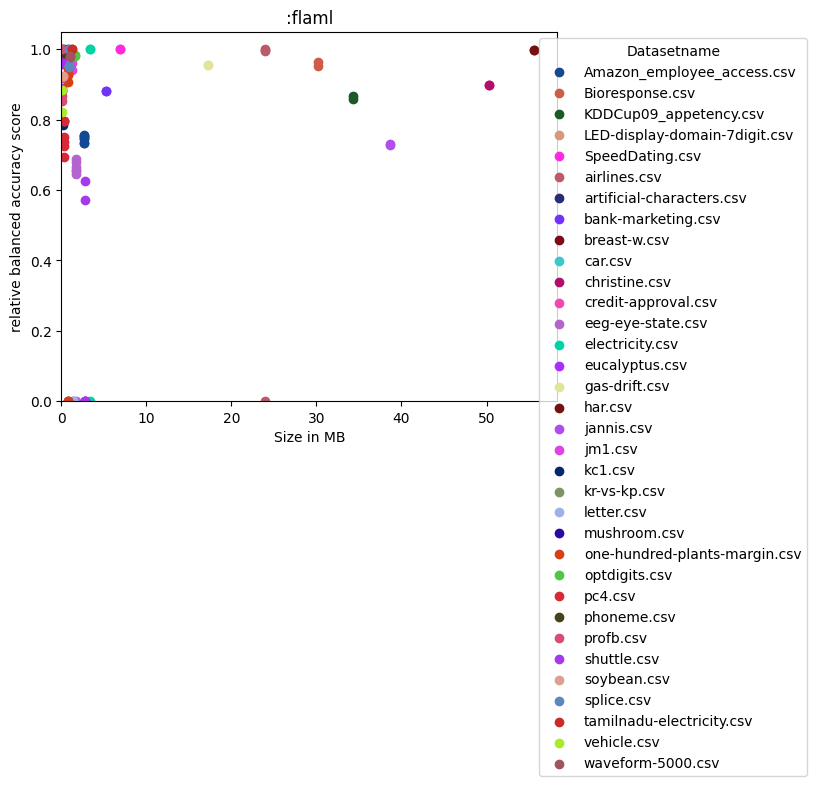

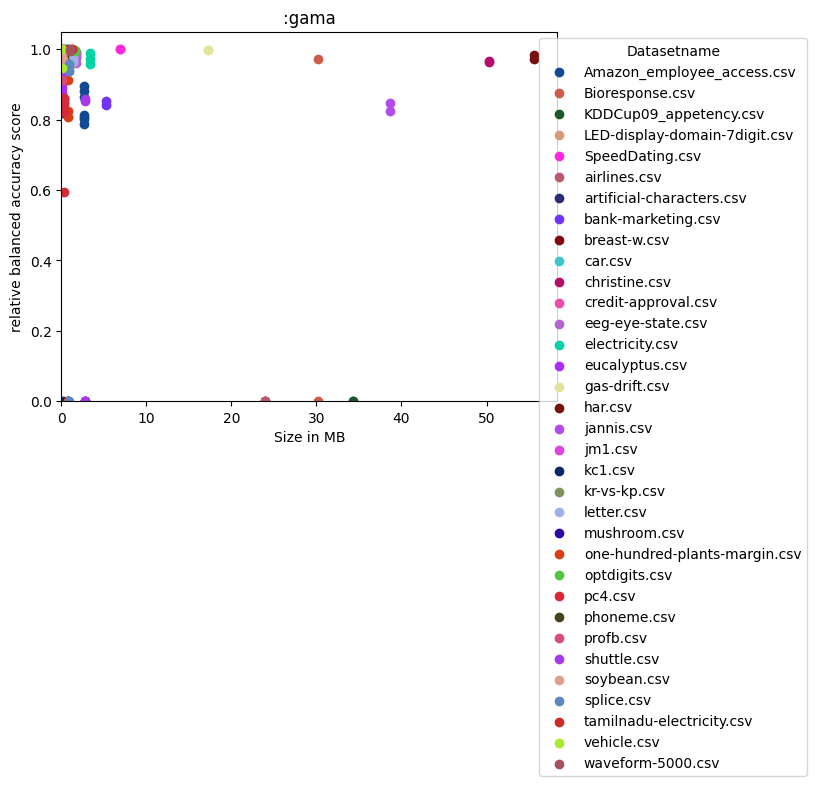

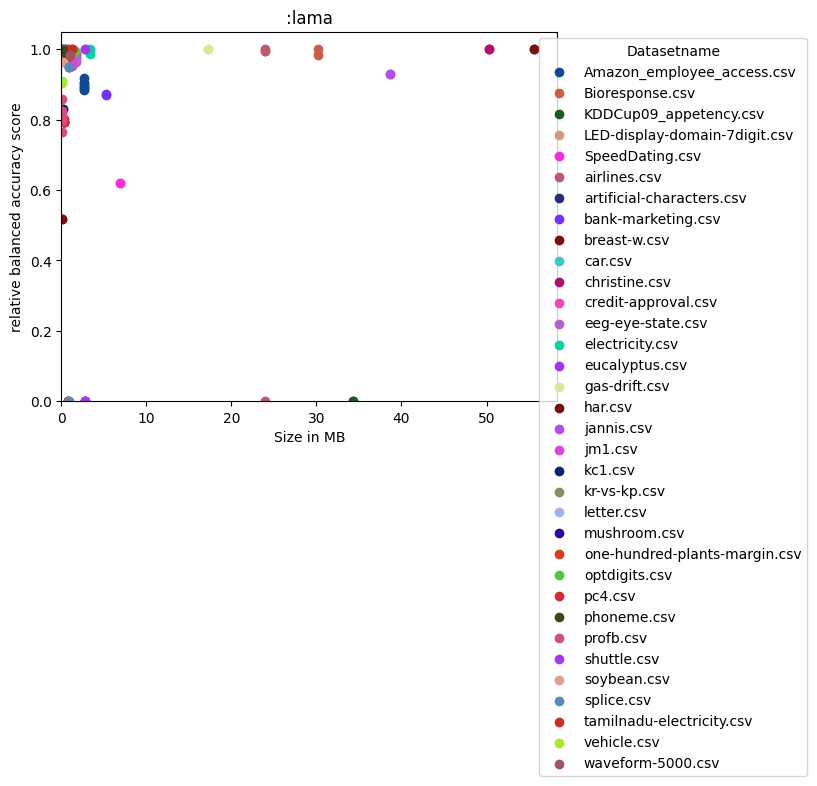

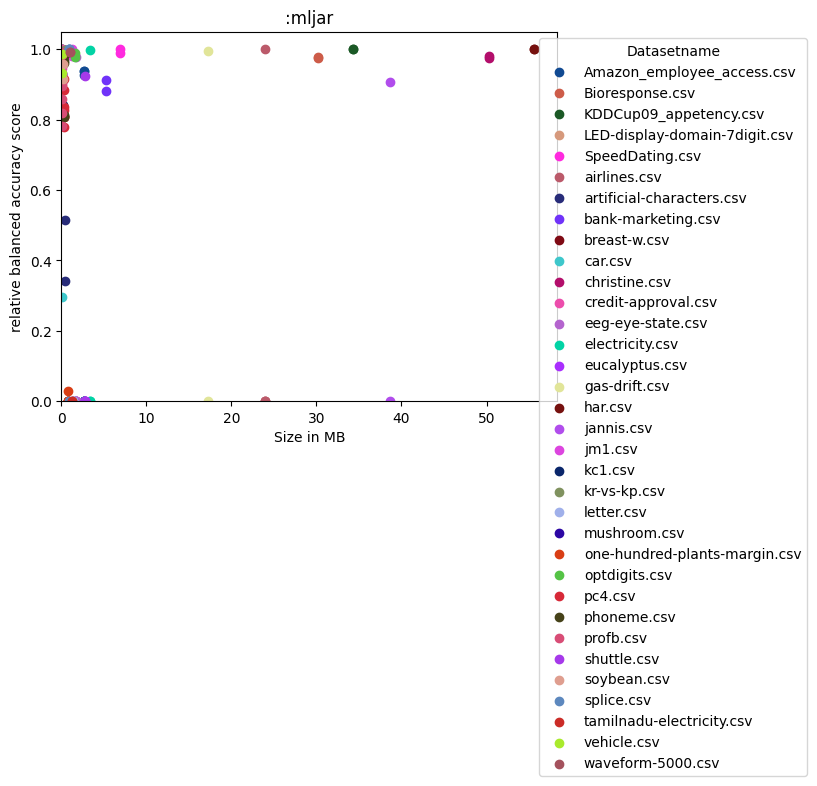

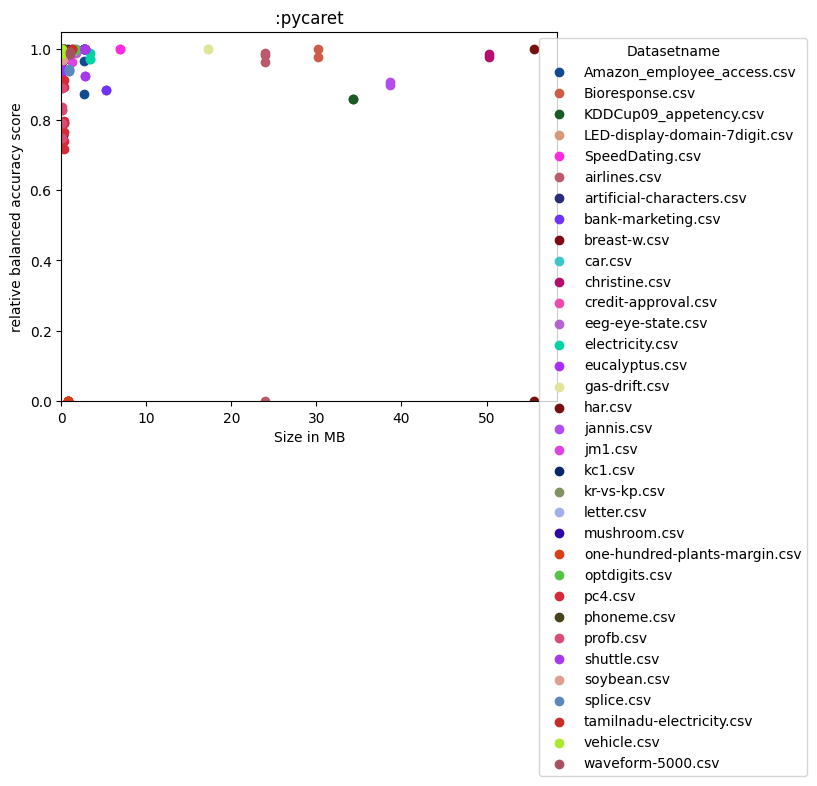

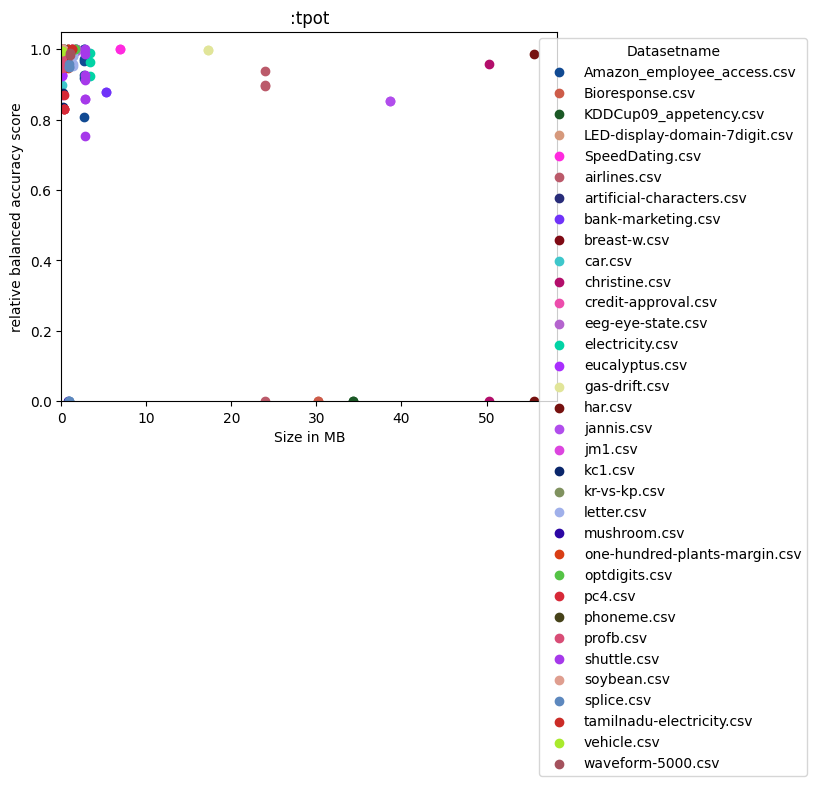

In [39]:
# create plots accuracy and size
for group in groups:
    automls = group[1].groupby(["AutoML_solution"])
    unique_names = group[1]["dataset_name"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)
    for automl in automls:
        if automl[1]["task"].unique()[0] == ":tabular_classification":
            for i, name in enumerate(unique_names):
                data = automl[1][automl[1]["dataset_name"] == name]
                plt.scatter(data["dataset_size_in_mb"], data["relative_"+ measure_classification], label=name, color=colors[i])
            plot(automl[1]["AutoML_solution"].unique()[0],"Size in MB", "relative balanced accuracy score","Datasetname")
        #else:
        #    for i, name in enumerate(unique_names):
        #        data = automl[1][automl[1]["dataset_name"] == name]
        #        plt.scatter(data["dataset_size_in_mb"], data["relative_" + measure_regression], label=name)
        #    plot(automl[1]["AutoML_solution"].unique()[0],"Size in MB", "relative rmse","Datasetname")
            
#"airlines.csv", "albert.csv", "KDDCup09_appetency.csv", "electricity.csv", "bank-marketing.csv", "Amazon_employee_access.csv", "riccardo.csv", "eeg-eye-state.csv", "jm1.csv", "SpeedDating.csv", "mushroom.csv", "christine.csv", "phoneme.csv", "Bioresponse.csv", "kr-vs-kp-csv", "kc1.csv", "pc4.csv", "profb.csv", "credit-approval.csv", "breast-w.csv", "covertype.csv", "dionis.csv", "Devnagari-Scripts.csv", "jannis.csv", "Fashion-MIST.csv", "shuttle.csv", "tamilnadu-electricity.csv", "letter.csv", "gas-drift.csv", "har.csv", "artificial-characters.csv", "optdigits.csv", "waveform-5000.csv", "splice.csv", "car.csv", "one-hundred-plants-margin.csv", "vehicle.csv", "eucalyptus.csv", "soybean.csv", "LED-display-domain-7digit.csv"



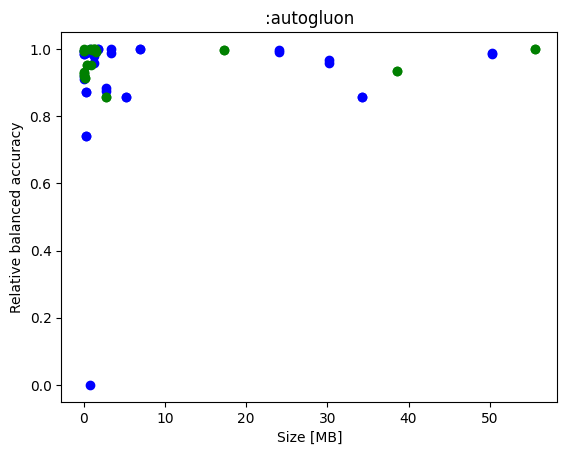

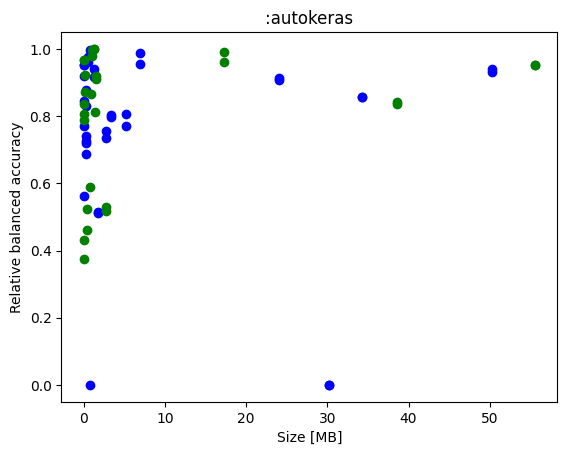

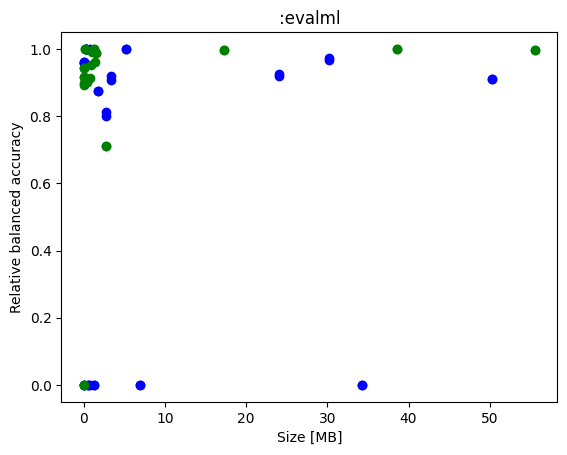

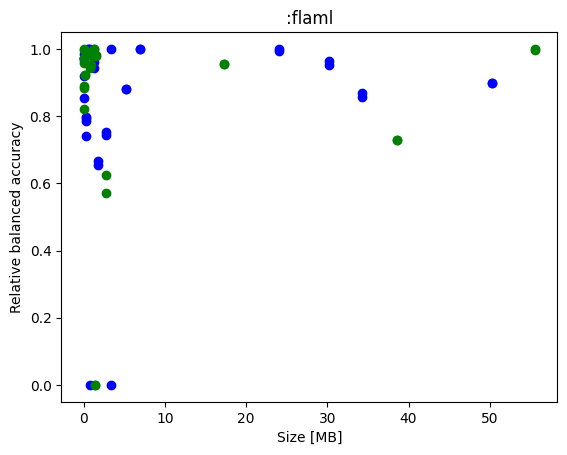

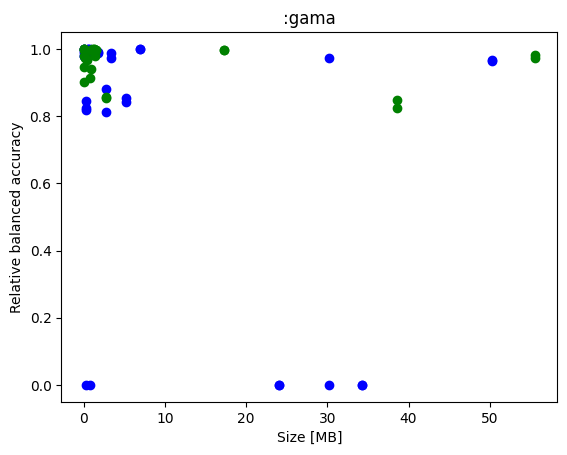

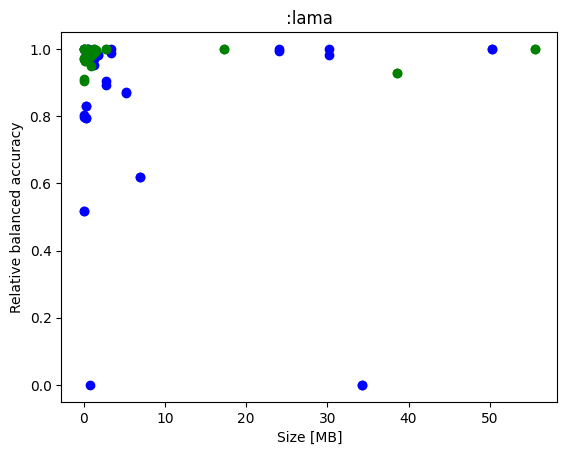

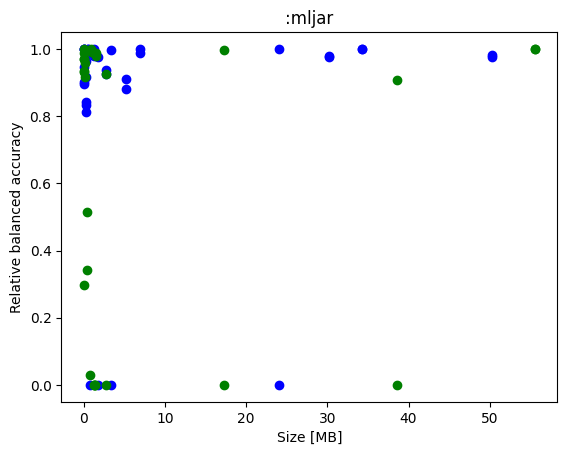

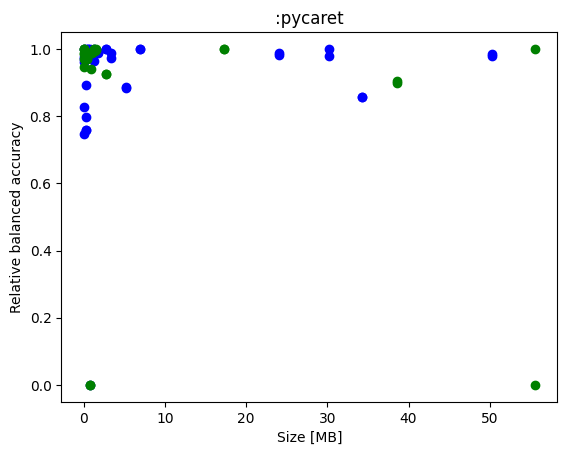

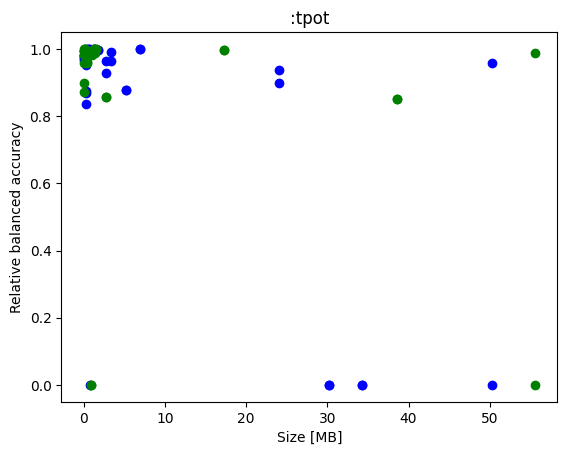

In [40]:
binary = ["airlines.csv", "KDDCup09_appetency.csv", "electricity.csv", "bank-marketing.csv", "Amazon_employee_access.csv", "eeg-eye-state.csv", "jm1.csv", "SpeedDating.csv", "mushroom.csv", "christine.csv", "phoneme.csv", "Bioresponse.csv", "kr-vs-kp.csv", "kc1.csv", "pc4.csv", "profb.csv", "credit-approval.csv", "breast-w.csv"]
mulitclass = ["jannis.csv", "shuttle.csv", "tamilnadu-electricity.csv", "letter.csv", "gas-drift.csv", "har.csv", "artificial-characters.csv", "optdigits.csv", "waveform-5000.csv", "splice.csv", "car.csv", "one-hundred-plants-margin.csv", "vehicle.csv", "eucalyptus.csv", "soybean.csv", "LED-display-domain-7digit.csv"]

groups_dataset = df.groupby(["dataset_name"])

for group in groups:
    automls = group[1].groupby(["AutoML_solution"])
    unique_names = group[1]["dataset_name"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)
    for automl in automls:
        if automl[1]["task"].unique()[0] == ":tabular_classification":
            data_binary = automl[1][automl[1]["runtime_limit"].isin([60, 240]) & automl[1]["dataset_name"].isin(binary)]
            data_multiclass = automl[1][automl[1]["runtime_limit"].isin([60, 240]) & automl[1]["dataset_name"].isin(mulitclass)]
            plt.scatter(data_binary["dataset_size_in_mb"], data_binary["relative_:balanced_accuracy"], color='blue', label='Binary')
            plt.scatter(data_multiclass["dataset_size_in_mb"], data_multiclass["relative_:balanced_accuracy"], color='green', label='Multiclass')
            automl[1]["AutoML_solution"].unique()[0],"Size [MB]", "Relative balanced accuracy","Datasetname"
            plt.xlabel("Size [MB]")
            plt.ylabel("Relative balanced accuracy")
            plt.title(automl[1]["AutoML_solution"].unique()[0])
            plt.show()


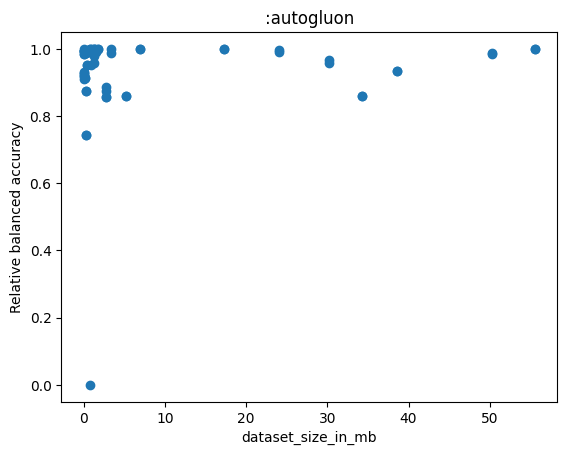

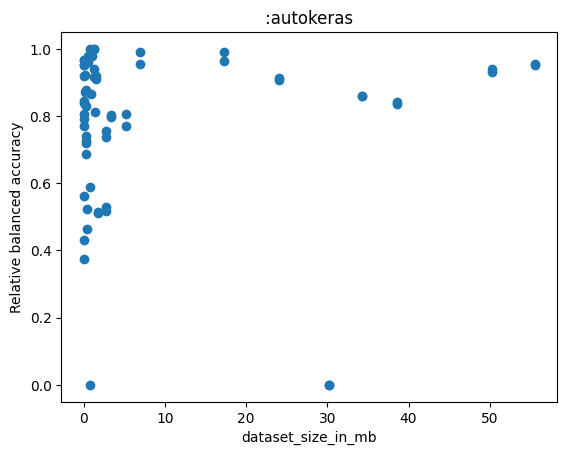

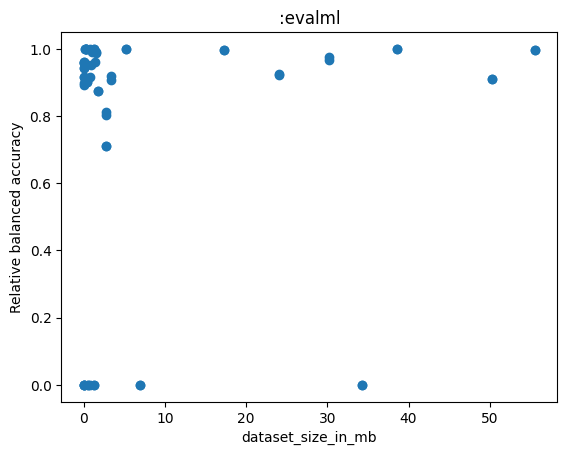

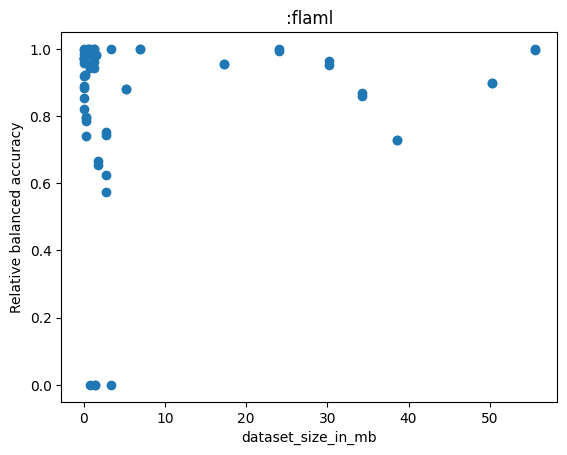

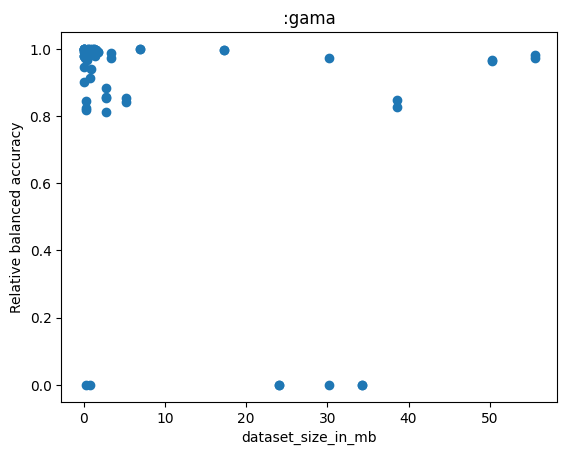

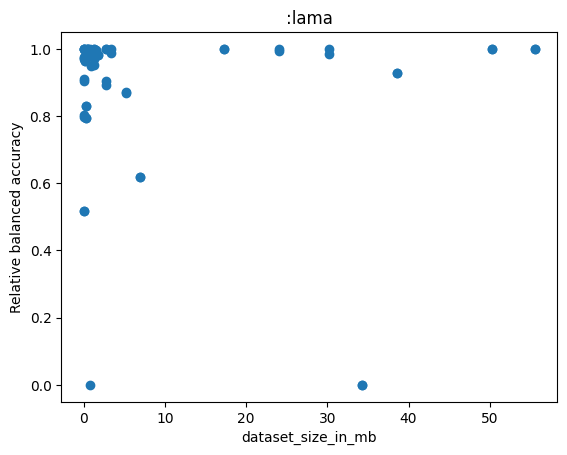

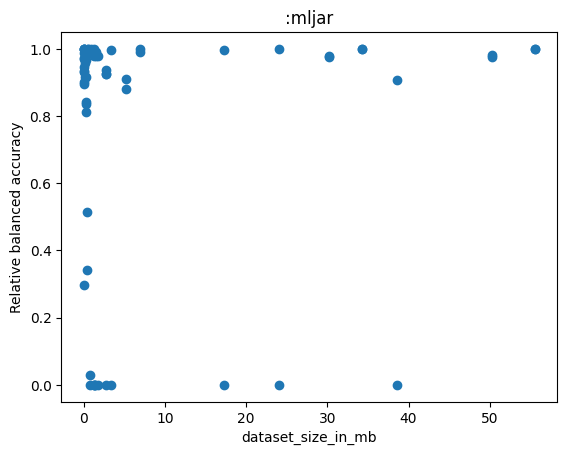

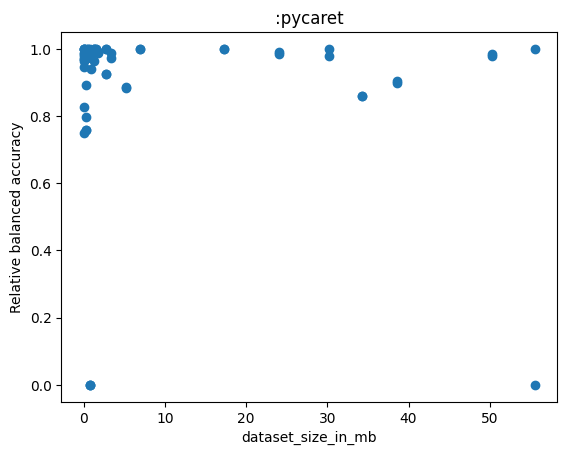

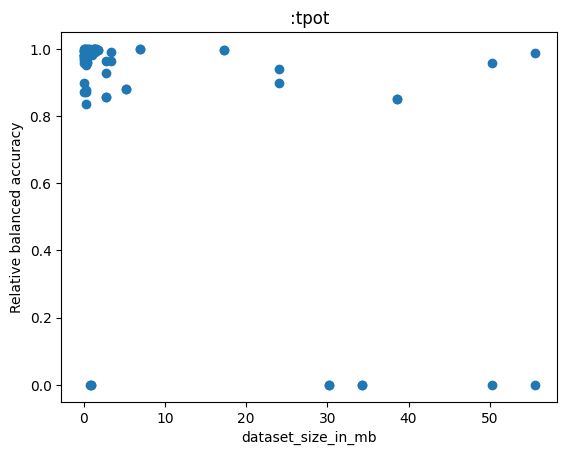

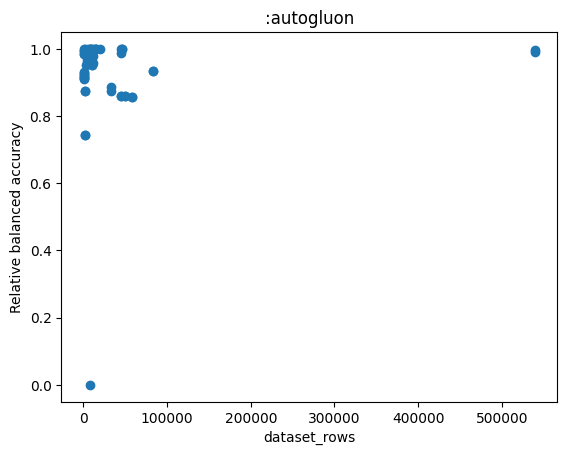

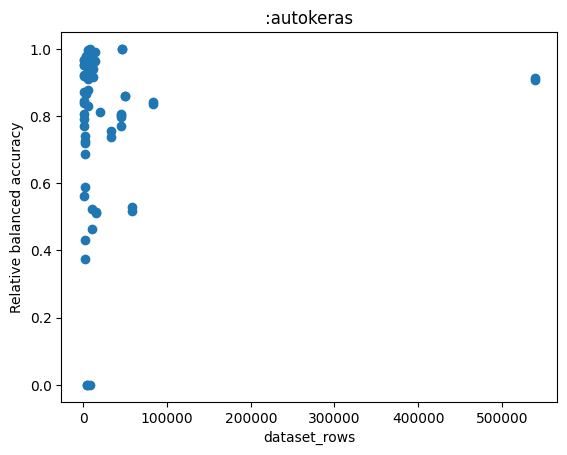

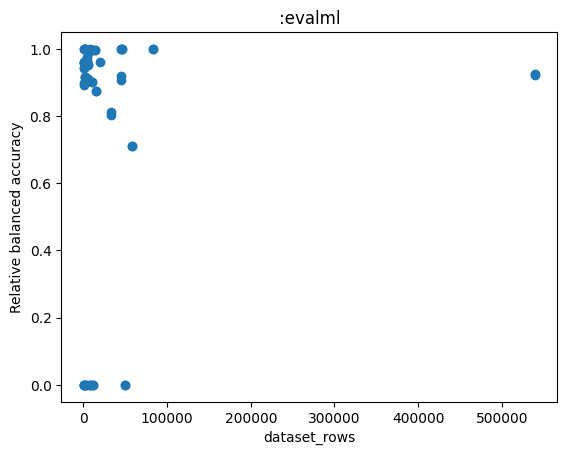

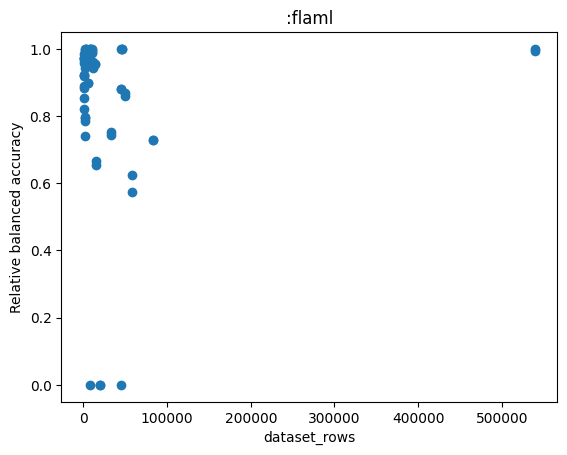

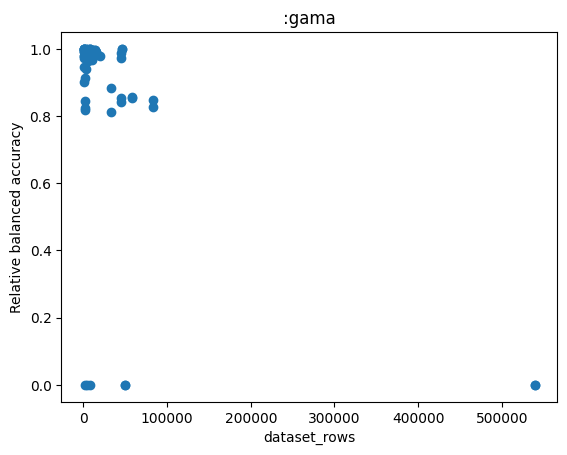

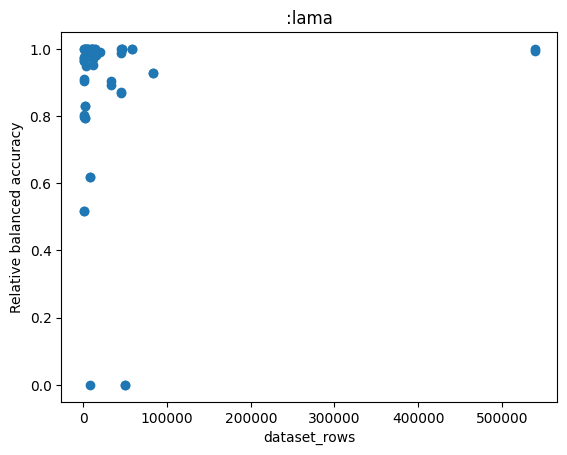

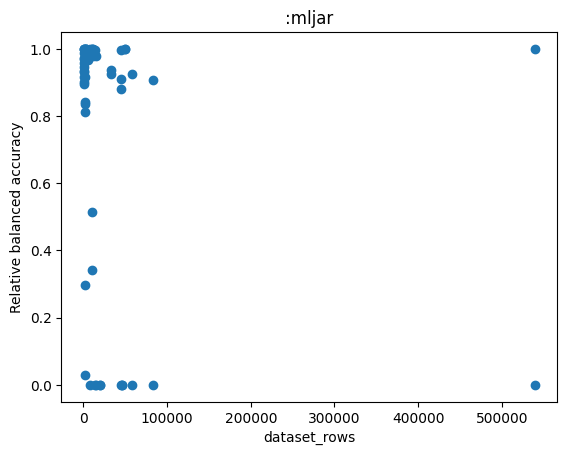

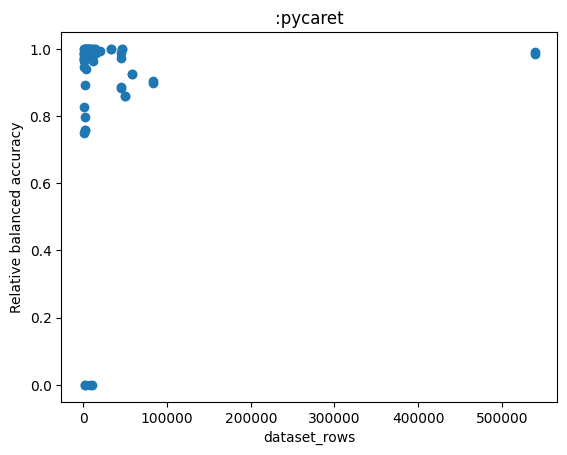

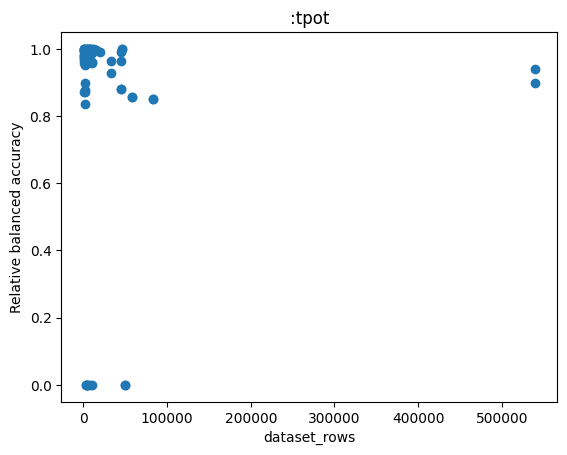

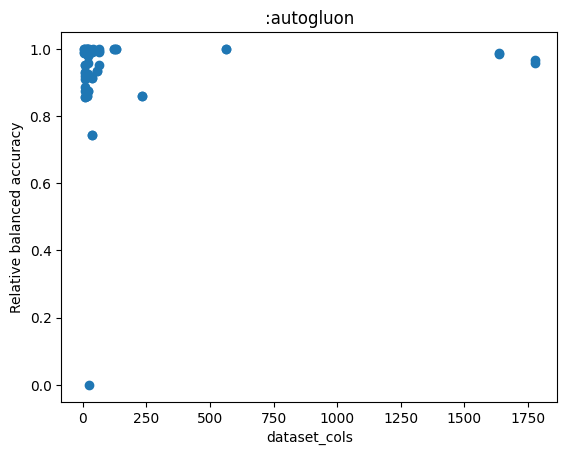

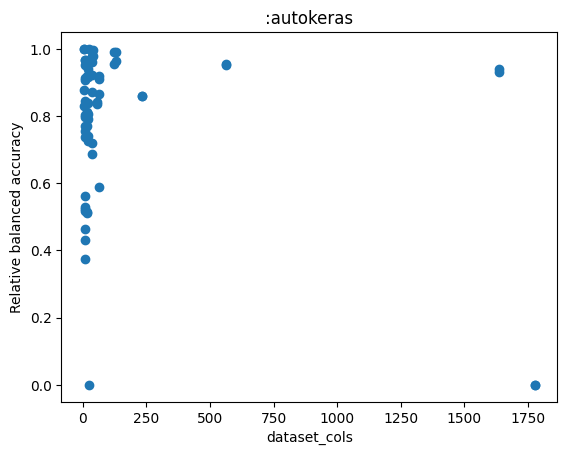

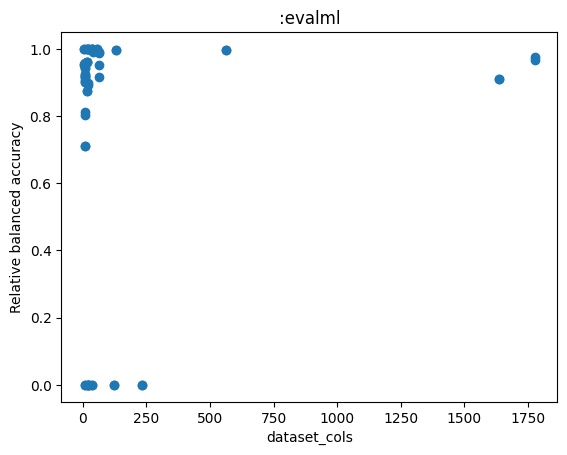

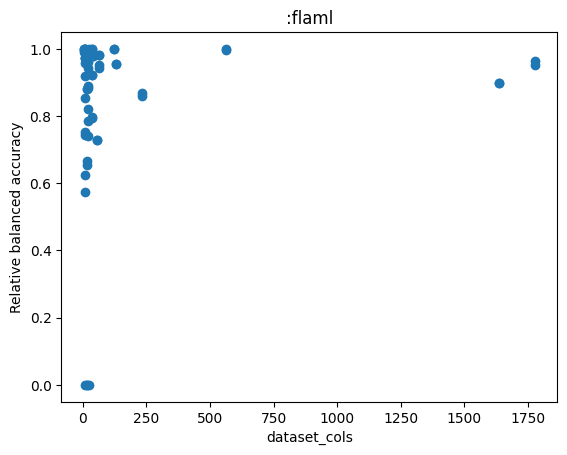

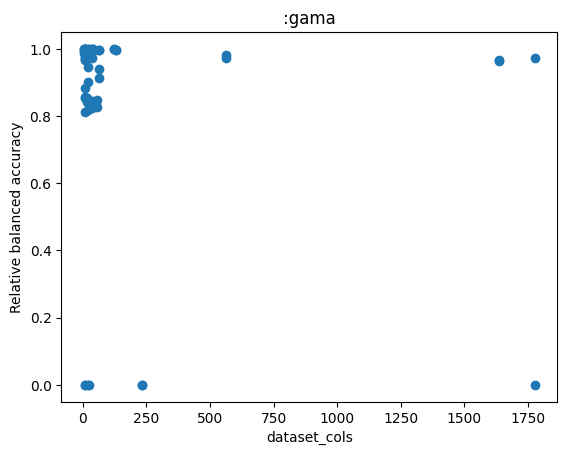

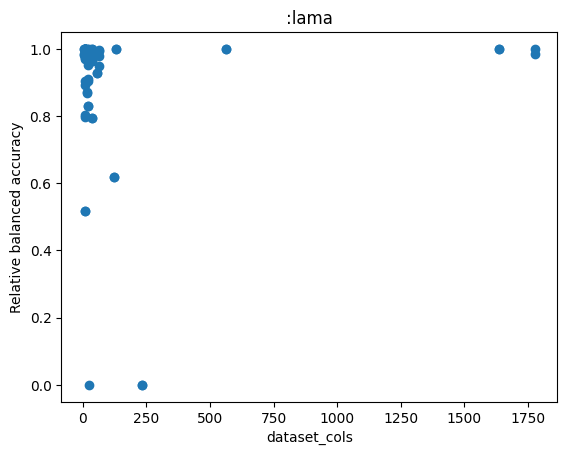

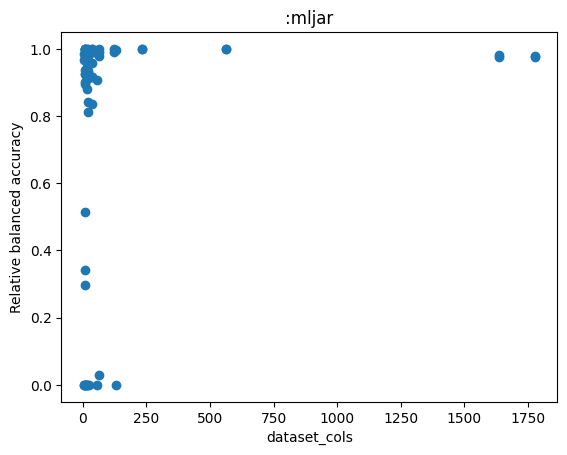

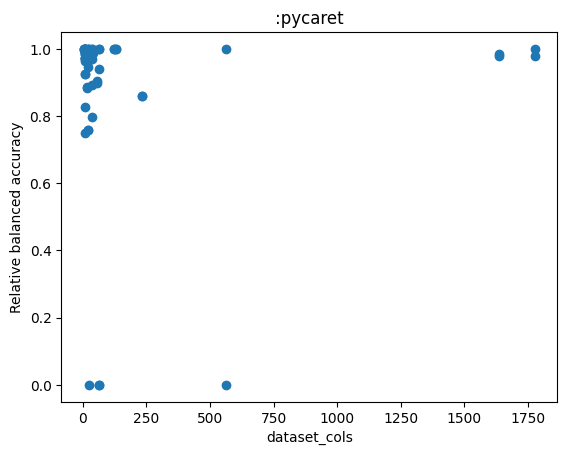

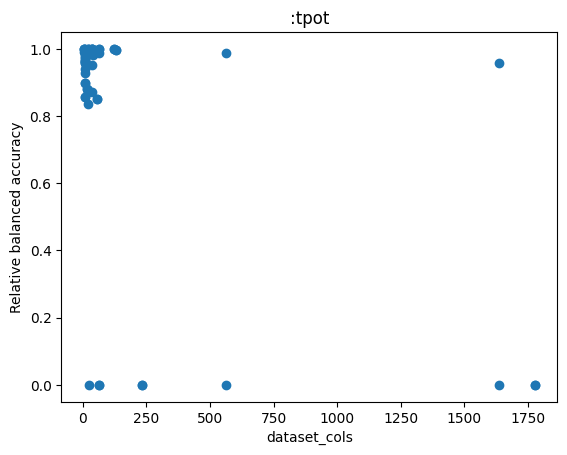

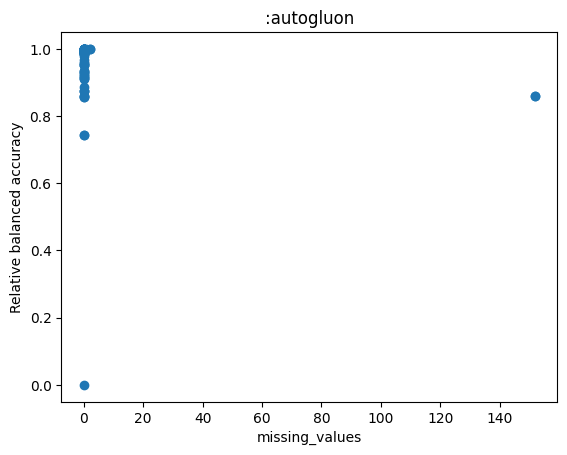

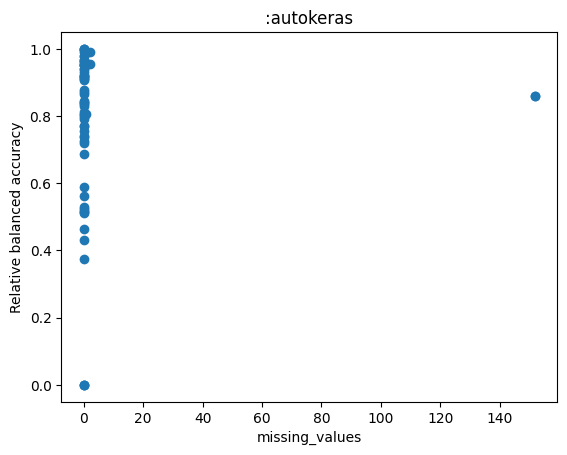

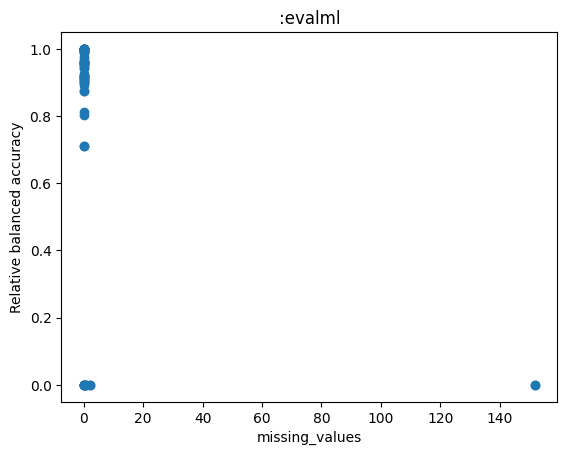

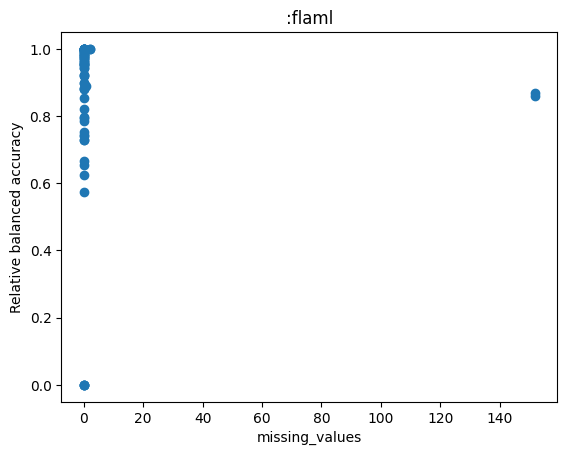

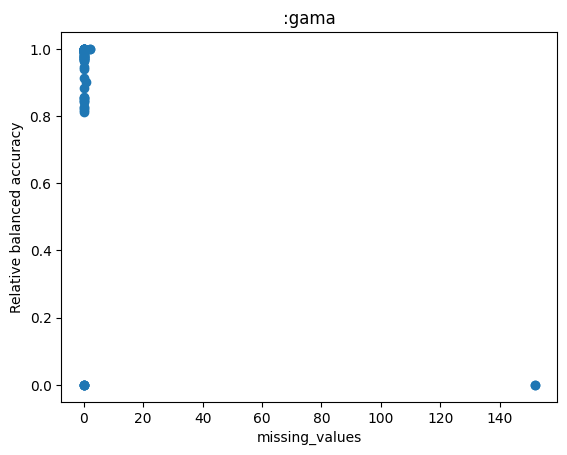

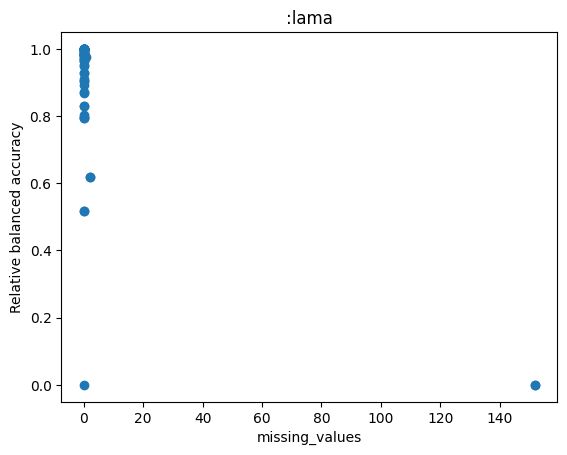

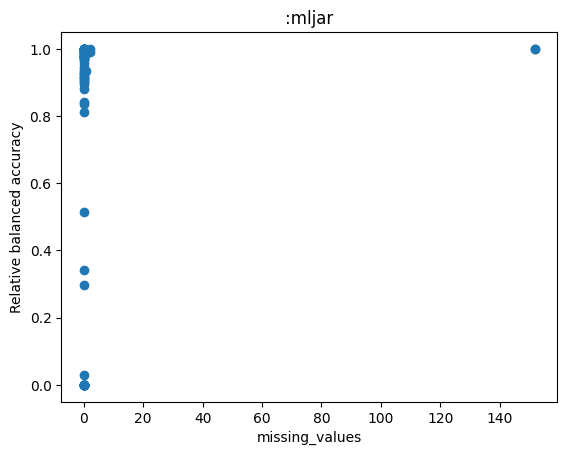

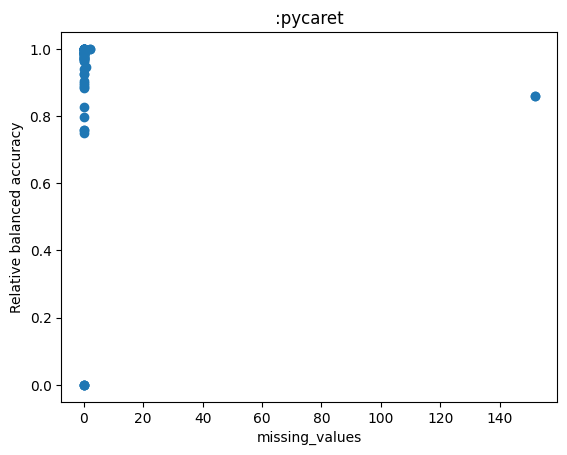

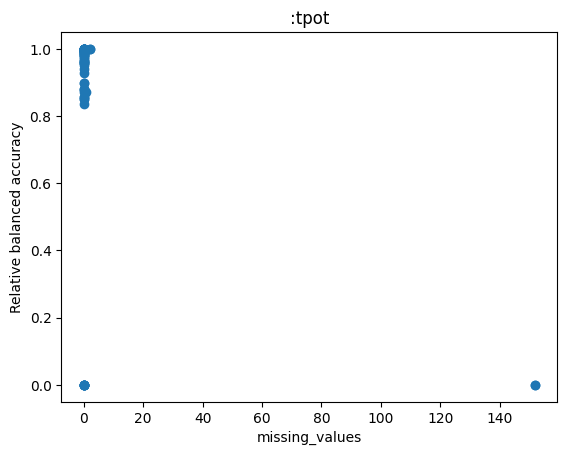

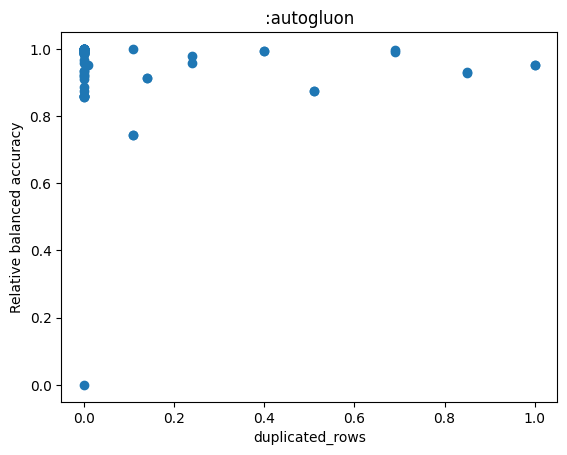

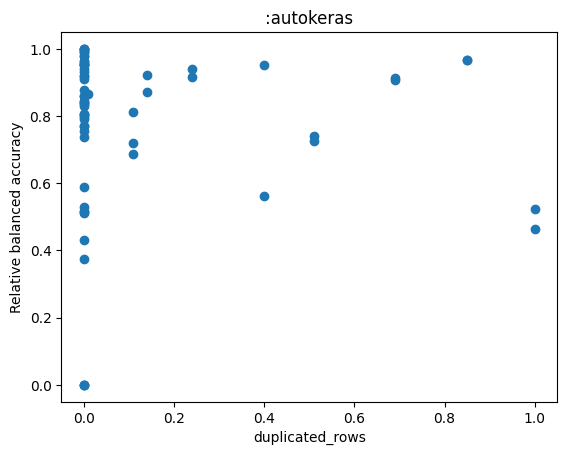

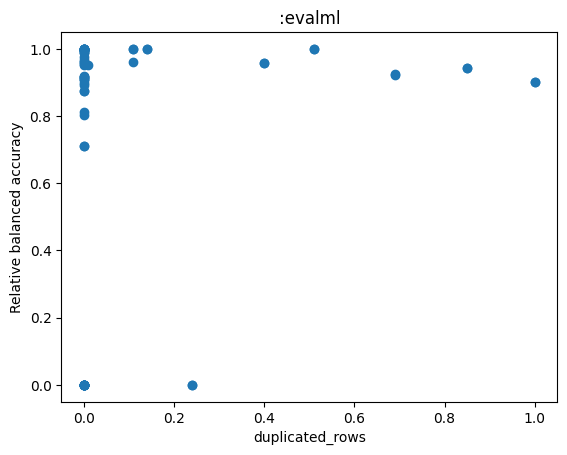

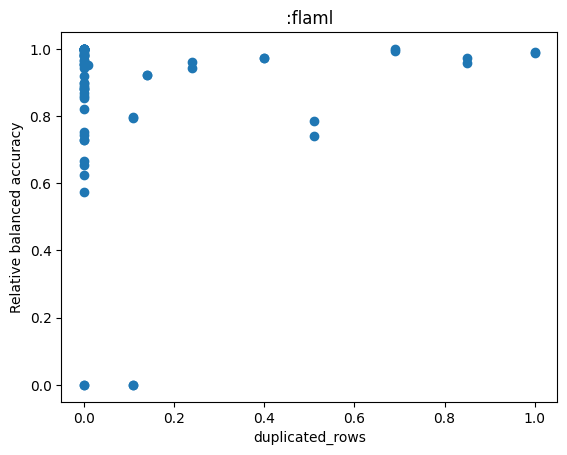

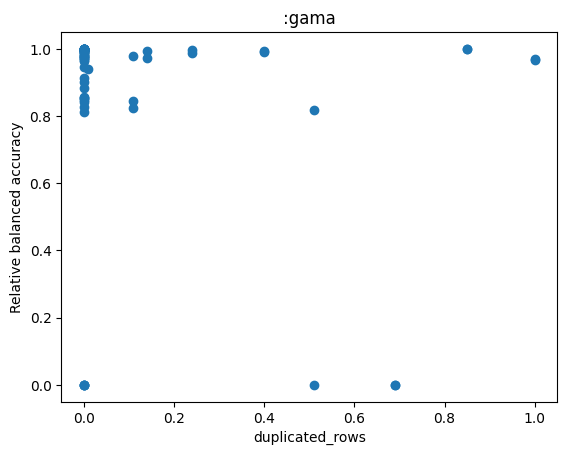

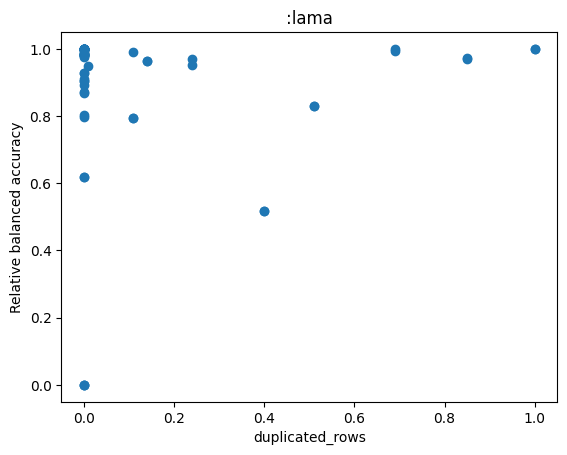

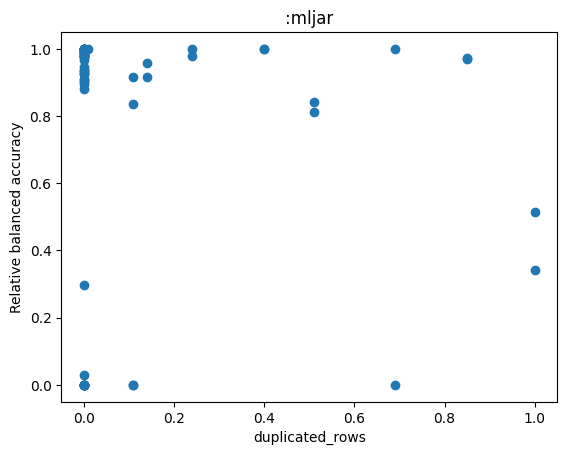

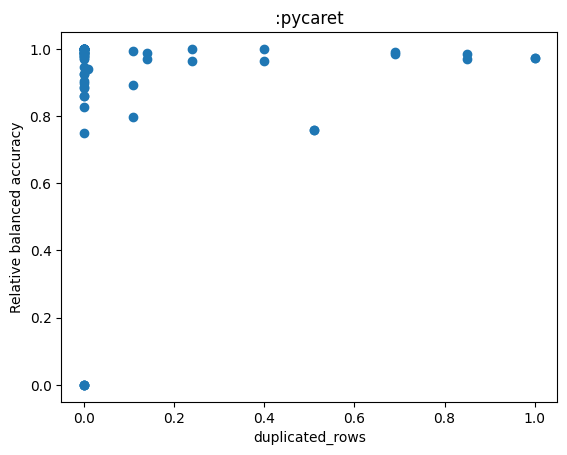

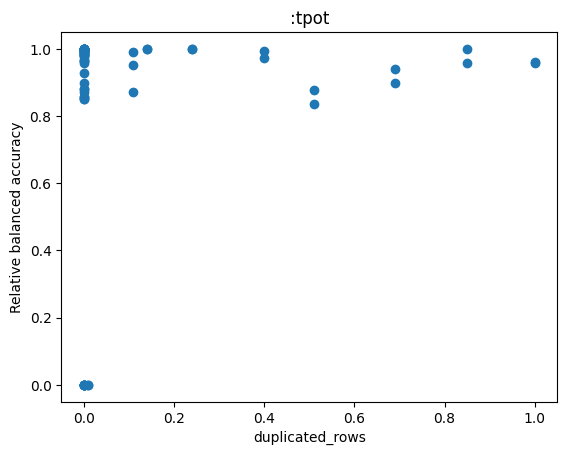

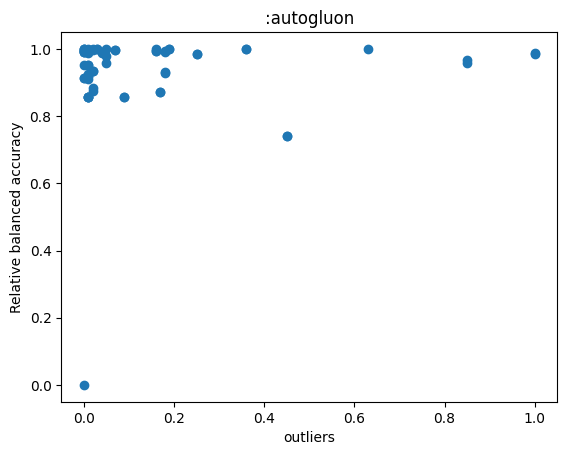

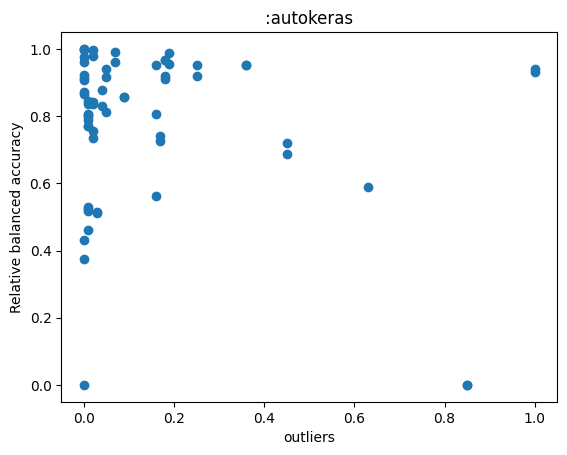

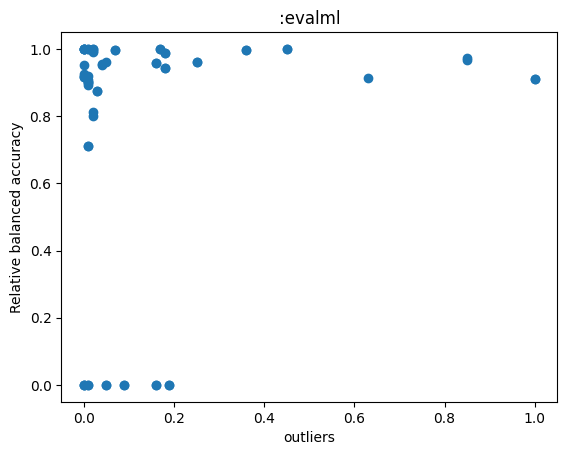

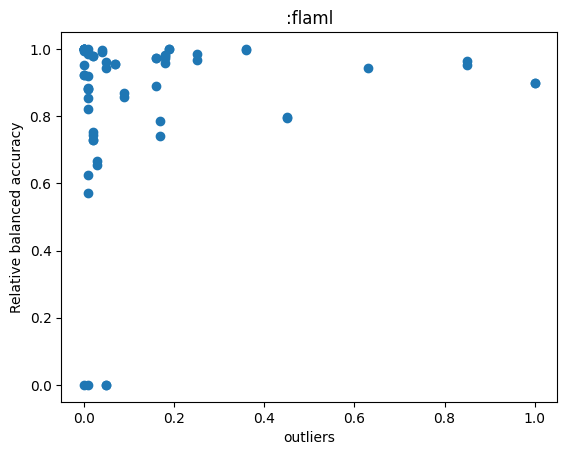

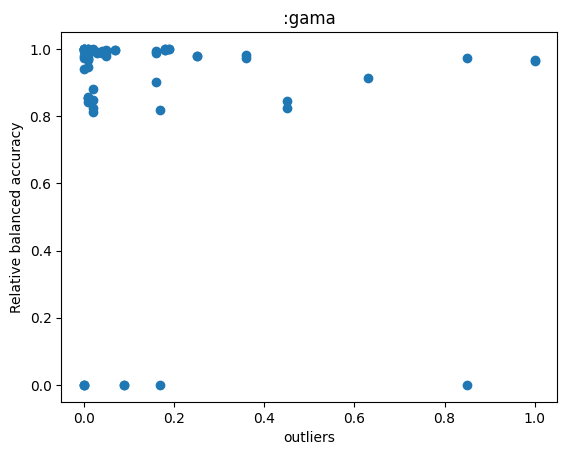

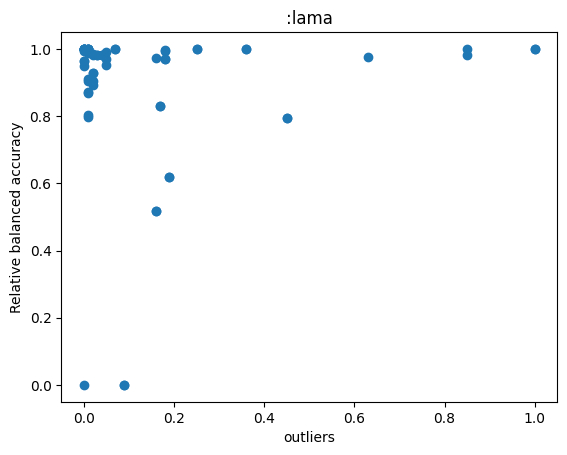

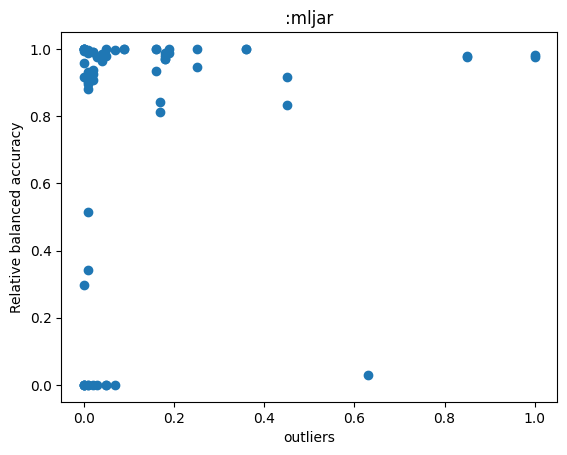

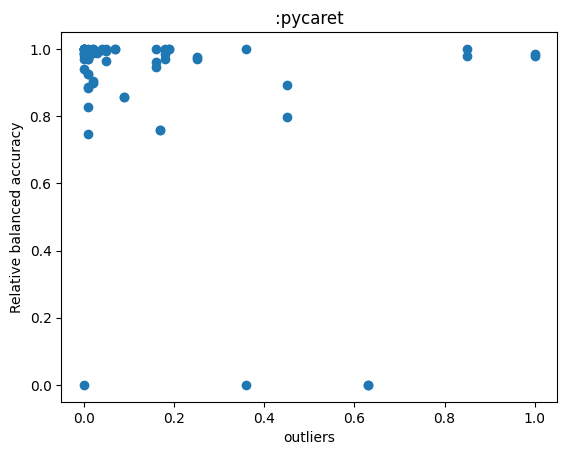

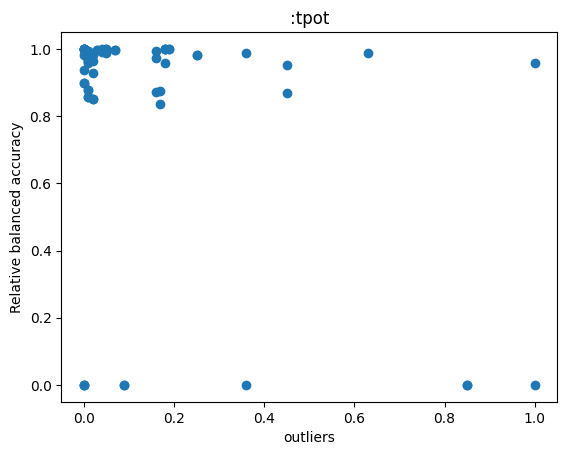

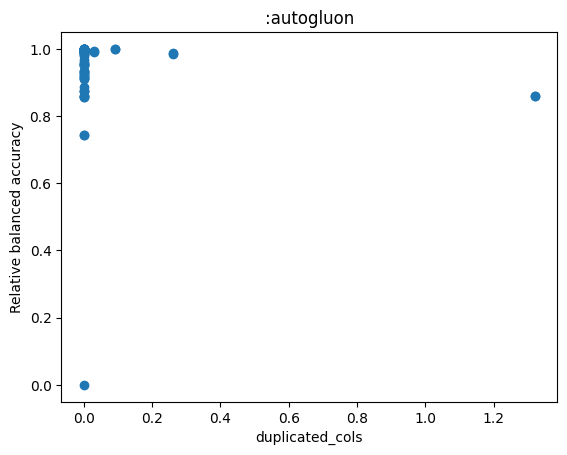

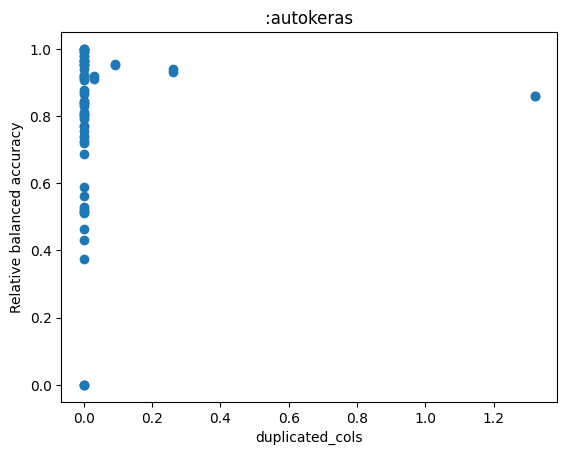

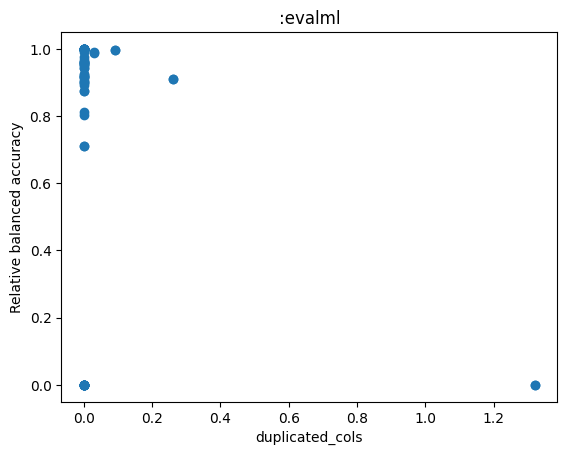

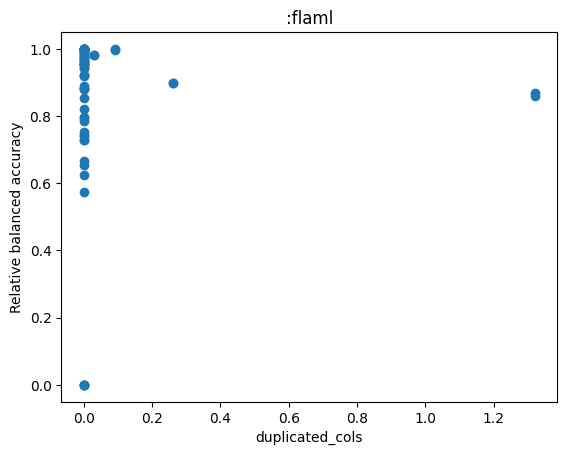

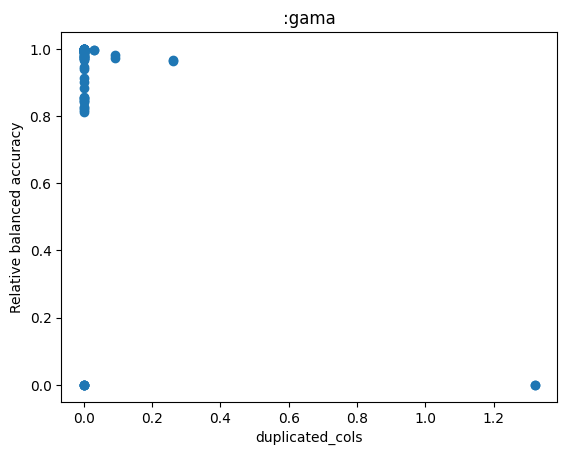

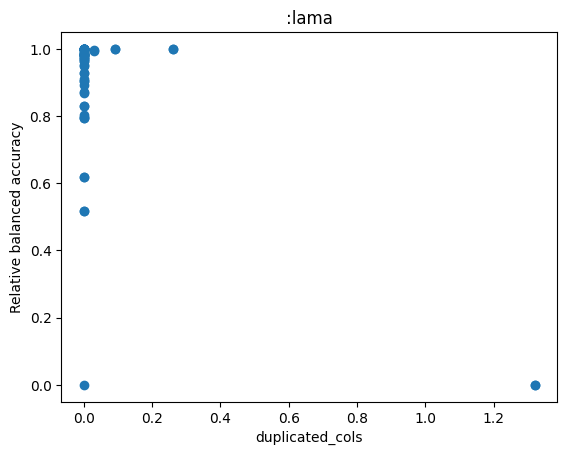

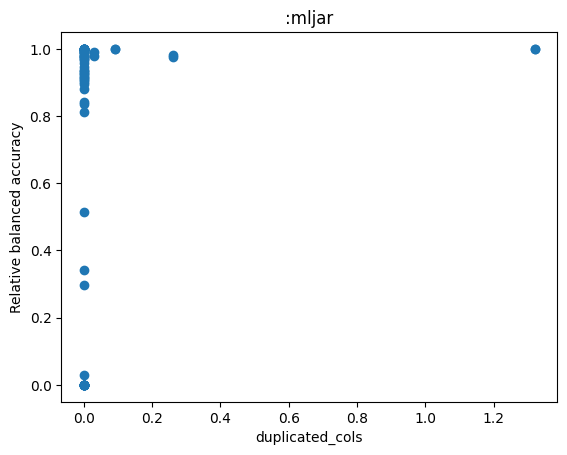

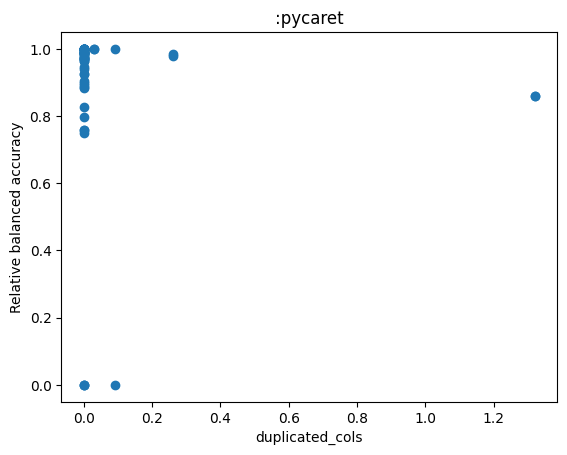

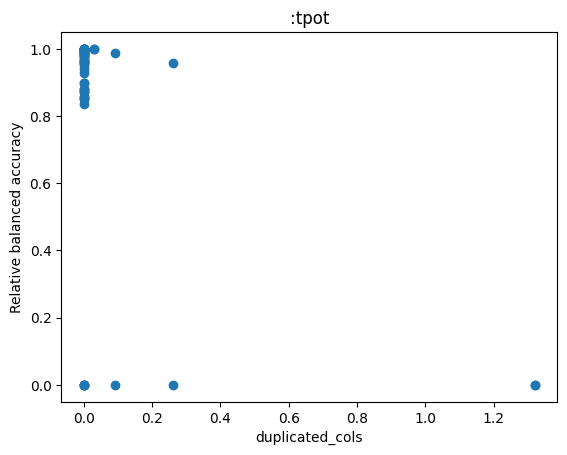

In [41]:

parameters = ["dataset_size_in_mb", "dataset_rows", "dataset_cols", "missing_values", "duplicated_rows", "outliers", "duplicated_cols"]
for para in parameters:
    # create plots accuracy and size
    for group in groups:
        automls = group[1].groupby(["AutoML_solution"])
        unique_names = group[1]["dataset_name"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        for automl in automls:
            if automl[1]["task"].unique()[0] == ":tabular_classification":
                data = automl[1][automl[1]["runtime_limit"].isin([60, 240])]
                plt.scatter(data[para], data["relative_"+ measure_classification])
                automl[1]["AutoML_solution"].unique()[0],para, "Relative balanced accuracy score","Datasetname"
                plt.xlabel(para)
                plt.ylabel("Relative balanced accuracy")
                plt.title(automl[1]["AutoML_solution"].unique()[0])
                plt.show()
            #else:
            #    data = automl[1][automl[1]["runtime_limit"] == 60]
            #    plt.scatter(data["dataset_size_in_mb"], data["relative_" + measure_regression])
            #    plt.xlabel("Size in MB")
            #    plt.ylabel("relative rmse")
            #    plt.title(automl[1]["AutoML_solution"].unique()[0])
            #    plt.show()


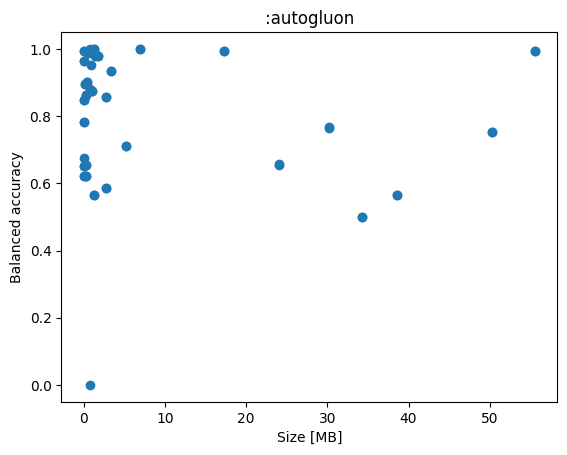

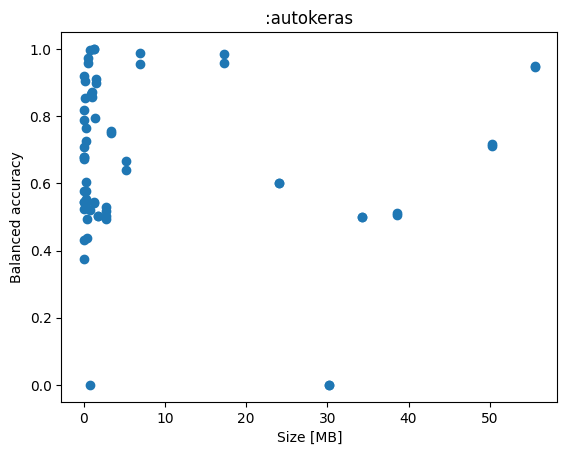

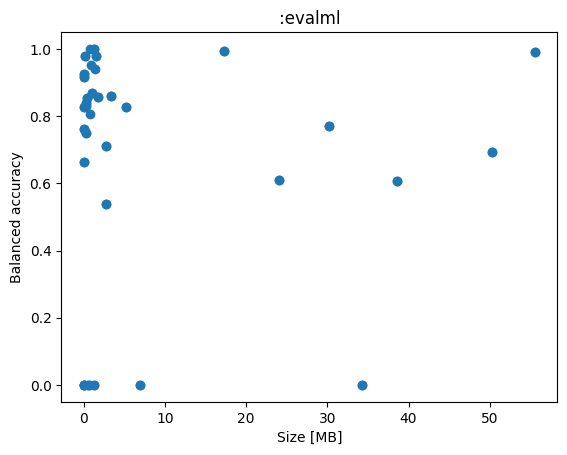

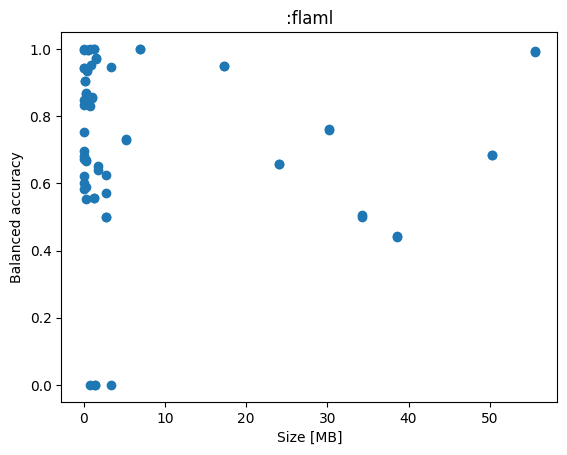

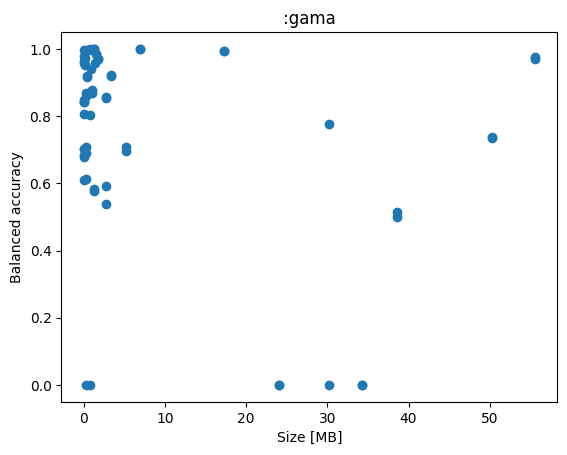

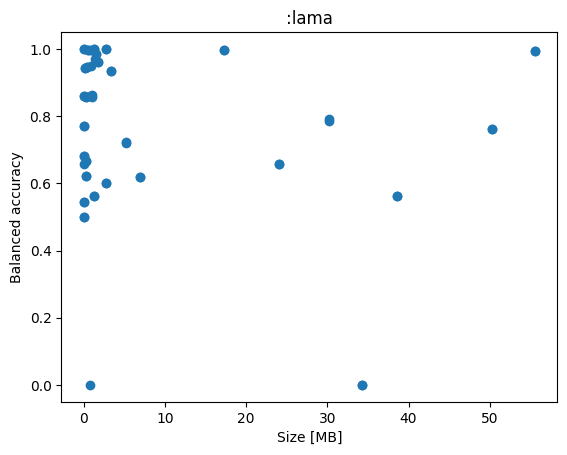

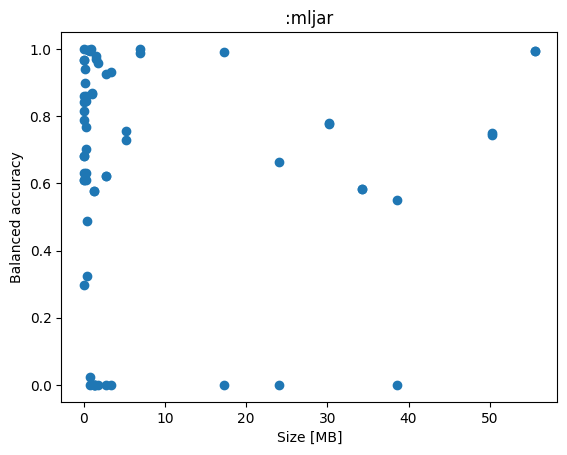

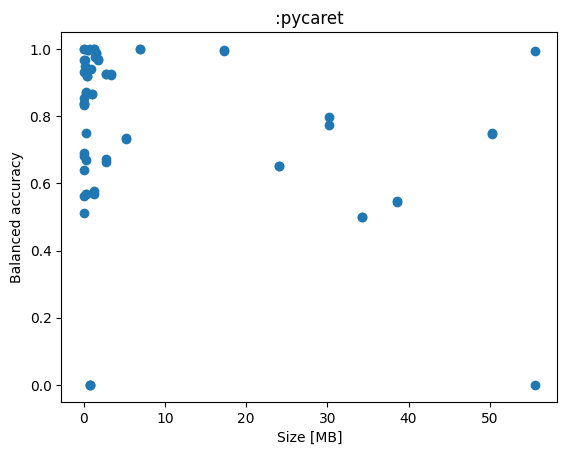

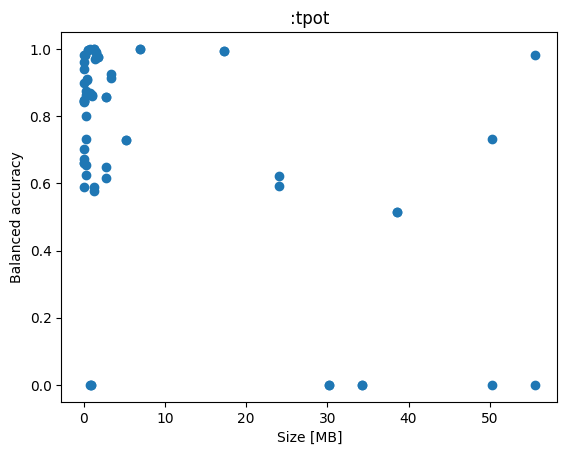

In [42]:
# create plots accuracy and size
for group in groups:
    automls = group[1].groupby(["AutoML_solution"])
    unique_names = group[1]["dataset_name"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)
    for automl in automls:
        if automl[1]["task"].unique()[0] == ":tabular_classification":
            data = automl[1][automl[1]["runtime_limit"].isin([60, 240])]
            plt.scatter(data["dataset_size_in_mb"], data[":balanced_accuracy"])
            automl[1]["AutoML_solution"].unique()[0],"Size [MB]", "Balanced accuracy","Datasetname"
            plt.xlabel("Size [MB]")
            plt.ylabel("Balanced accuracy")
            plt.title(automl[1]["AutoML_solution"].unique()[0])
            plt.show()
        #else:
        #    data = automl[1][automl[1]["runtime_limit"] == 60]
        #    plt.scatter(data["dataset_size_in_mb"], data["relative_" + measure_regression])
        #    plt.xlabel("Size in MB")
        #    plt.ylabel("relative rmse")
        #    plt.title(automl[1]["AutoML_solution"].unique()[0])
        #    plt.show()


This section is for generating a plot for each task to plot the size in combination with the best runtime limit for each dataset
Also it plots the linear regession for the calculated parameters for the runtime prediction

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame containing the data
# filtered_groups = ... (your group filtering code)

parameters = ["dataset_rows"]
for para in parameters:
    for group in runtime_groups:
        unique_names = group[1]["AutoML_solution"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        task = group[1]["task"].unique()[0][2:-2]

        plt.figure(figsize=(10, 6))  # Adjust size as needed

        # Initialize arrays to store data and sizes
        x_all = []
        y_all = []
        sizes = []

        for i, name in enumerate(unique_names):
            data = group[1][group[1]["AutoML_solution"] == name]
            x = data[para]
            y = data["best_runtime_limit"]
            x_all.extend(x)
            y_all.extend(y)
            sizes.extend([100] * len(x))  # Adjust bubble size as needed

        # Perform linear regression
        x = np.array(x_all)
        y = np.array(y_all)
        slope, intercept, r, p, std_err = stats.linregress(x, y)

        # Generate model predictions
        model_predictions = slope * x + intercept

        # Plot scatter with bubble sizes
        plt.scatter(x, y, c=model_predictions, cmap='coolwarm', s=sizes, alpha=0.5)

        # Add color bar for reference
        cb = plt.colorbar()
        cb.set_label('Model Predictions')

        # Plot regression line
        plt.plot(x, slope * x + intercept, color='black')

        # Add labels and title
        plt.xlabel(para)
        plt.ylabel("Runtime limit")
        plt.title(f"{task} - {para} vs. Runtime Limit")

        # Add legend
        plt.legend(unique_names)

        plt.show()


dataset_rows Mean Absolute Error (MAE): 13.228309755636165


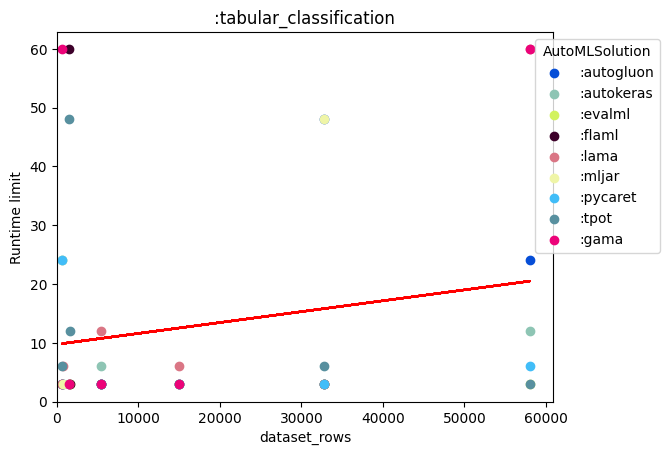

In [47]:

from scipy import stats

#parameters = ["dataset_size_in_mb", "dataset_rows", "dataset_cols", "missing_values", "duplicated_rows", "outliers"]
parameters = ["dataset_rows"]
for para in parameters:
    x = []
    y = []
    for group in runtime_groups:
        unique_names = group[1]["AutoML_solution"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        task = group[1]["task"].unique()[0][2:-2]
        for i, name in enumerate(unique_names):
            data = group[1][group[1]["AutoML_solution"] == name]
            plt.scatter(data[para], data["best_runtime_limit"], label=name, color=colors[i])
            x.extend(data[para].values)
            y.extend(data["best_runtime_limit"].values)
        
        def myfunc(x):
            return slope * x + intercept
        
        slope, intercept, r, p, std_err = stats.linregress(x, y)

        mymodel = list(map(myfunc, x))


        plt.plot(x, mymodel, color = "red")

        # Compute absolute errors
        absolute_errors = [abs(actual - predicted) for actual, predicted in zip(np.array(y), np.array(mymodel))]

        # Compute MAE
        mae = sum(absolute_errors) / len(np.array(mymodel))

        print(f"{para} Mean Absolute Error (MAE):", mae)
        
        #x_data = np.linspace(0, group[1]["dataset_size_in_mb"].max() , 100)
        #y_line = [parameter[task]["m"]* x + parameter[task]["b"] for x in x_data]
        #y_line = [parameter[task]["m"]* x for x in x_data]
        #plt.plot(x_data, y_line, color = "red")
        plot(task,para,"Runtime limit", "AutoMLSolution" )
        #plot("Runtime suggestion","Size [MB]","runtime limit", "" )


This section is for generating a plot for each task and each automlsolution to plot the size in combination with the best runtime limit for each dataset

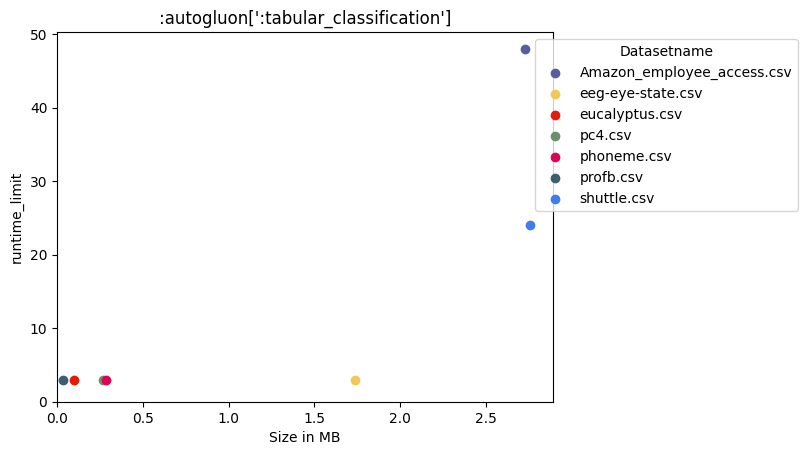

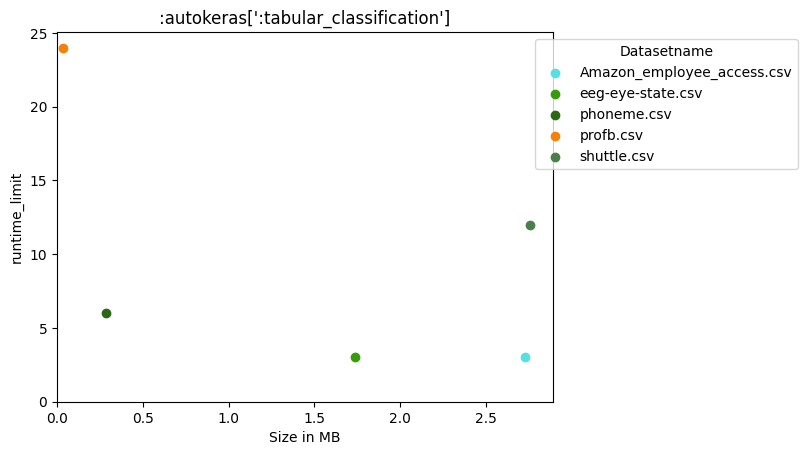

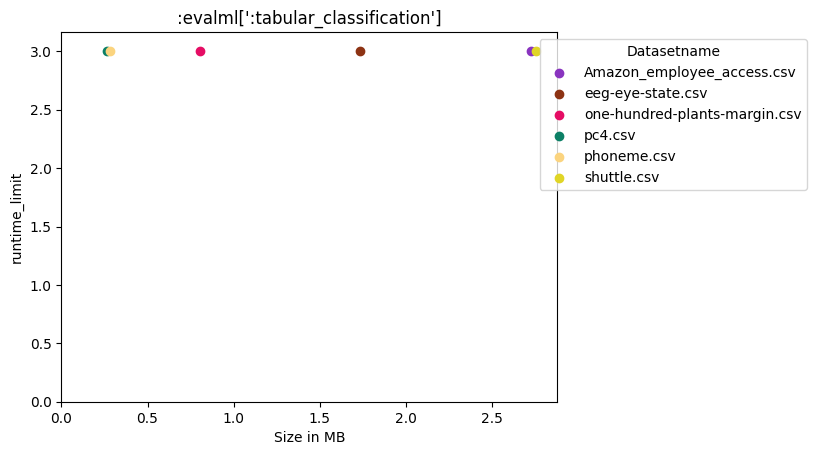

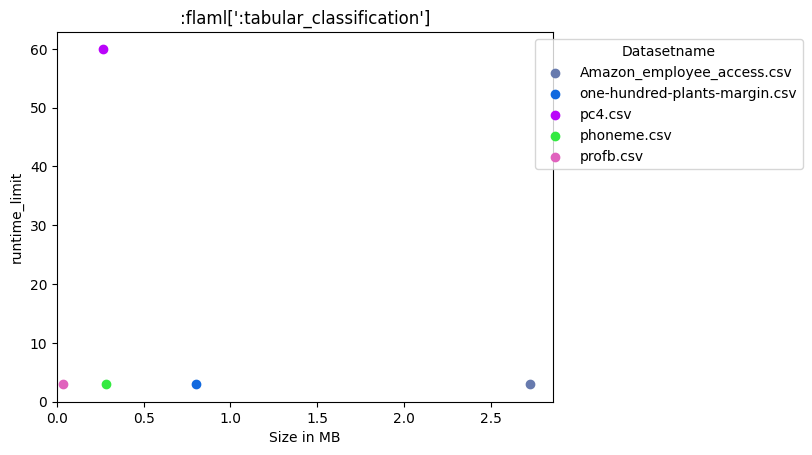

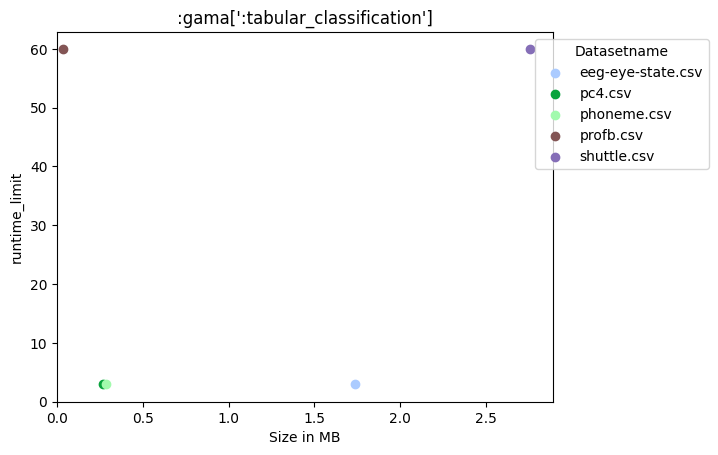

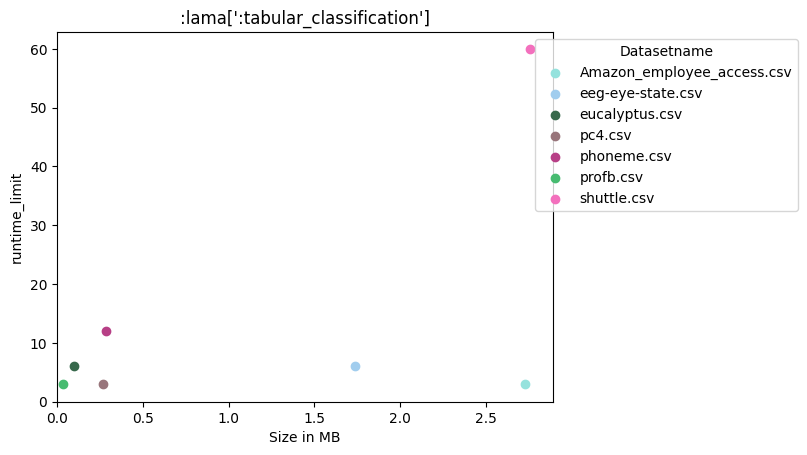

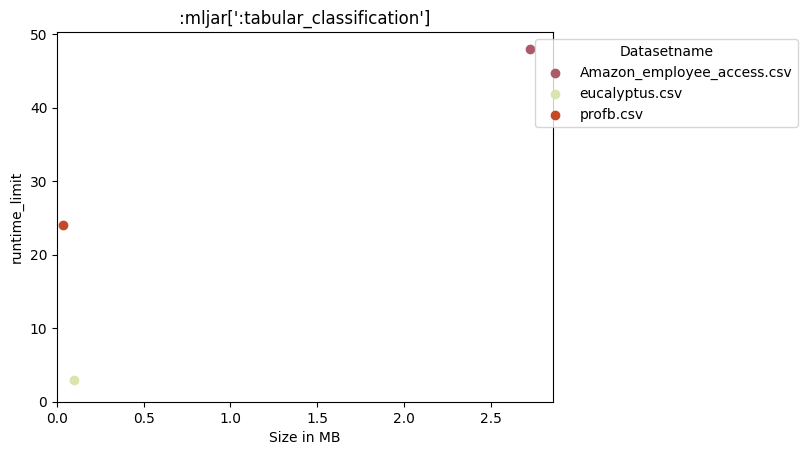

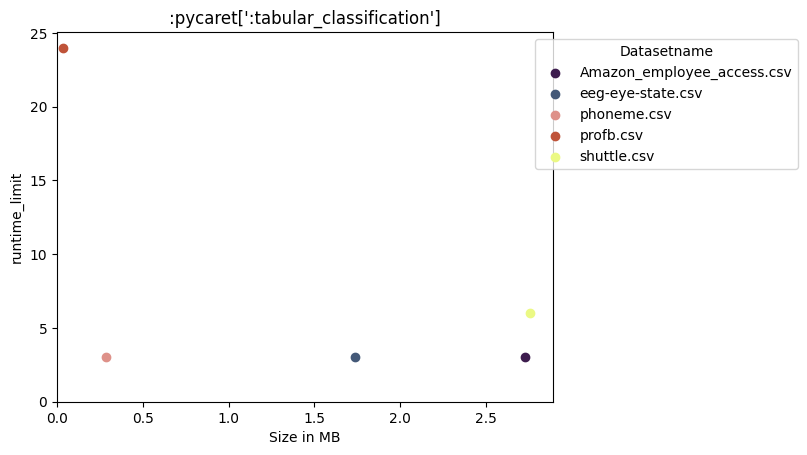

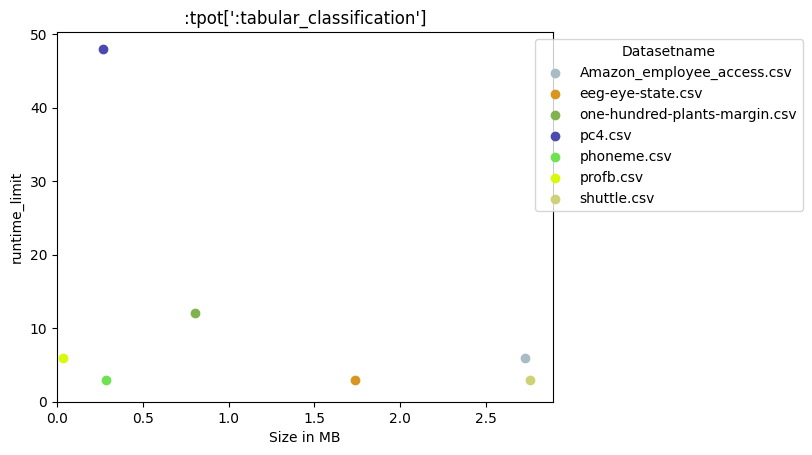

In [ ]:

for group in runtime_groups:
    automls = group[1].groupby(["AutoML_solution"])
    for automl in automls:
        unique_names = automl[1]["dataset_name"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        for i, name in enumerate(unique_names):
            data = automl[1][automl[1]["dataset_name"] == name]
            plt.scatter(data["dataset_size_in_mb"], data["best_runtime_limit"], label=name, color=colors[i])
        plot(automl[1]["AutoML_solution"].unique()[0] + automl[1]["task"].unique()[0],"Size in MB","runtime_limit", "Datasetname" )

In [ ]:
for group in groups:
    automls = group[1].groupby(["AutoML_solution"])
    unique_names = group[1]["dataset_name"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)
    for automl in automls:
        if automl[1]["task"].unique()[0] == ":tabular_classification":
            data = automl[1][automl[1]["runtime_limit"] == 60]
            print(":tabular_classification")
            print(automl[1]["AutoML_solution"].unique()[0])
            bin1 = data[data["dataset_size_in_mb"]< 100]
            bin2 = data[data["dataset_size_in_mb"]>= 100]
            mean_bin_1 = bin1["relative_" + measure_classification].mean()
            mean_bin_2 = bin2["relative_" + measure_classification].mean()
            print(mean_bin_1)
            print(mean_bin_2)
        else:
            data = automl[1][automl[1]["runtime_limit"] == 60]
            print(":tabular_regression")
            print(automl[1]["AutoML_solution"].unique()[0])
            mean = data["relative_" + measure_regression].mean()
            print(mean)

:tabular_classification
:autogluon
0.8850476062932507
nan
:tabular_classification
:autokeras
0.7553973972994342
nan
:tabular_classification
:evalml
0.8116177640880889
nan
:tabular_classification
:flaml
0.7534095094118042
nan
:tabular_classification
:gama
0.812471831548151
nan
:tabular_classification
:lama
0.9033403598865796
nan
:tabular_classification
:mljar
0.937414206943797
nan
:tabular_classification
:pycaret
1.0
nan
:tabular_classification
:tpot
0.9274747675056466
nan
:tabular_classification
:autogluon
0.9676840377365296
nan
:tabular_classification
:autokeras
0.0
nan
:tabular_classification
:evalml
0.9741508378880532
nan
:tabular_classification
:flaml
0.9634449916121004
nan
:tabular_classification
:gama
0.0
nan
:tabular_classification
:lama
1.0
nan
:tabular_classification
:mljar
0.9789580965780976
nan
:tabular_classification
:pycaret
0.9776908923643054
nan
:tabular_classification
:tpot
0.0
nan
:tabular_classification
:autogluon
0.857998457059737
nan
:tabular_classification
:autoker